# Assignment - Advanced Linear Regression (Surpise Housing)
## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Step 1: Reading and Understanding the Data

### Importing necessary libraries required for the analysis and model building


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data Dictionary 

[Link to Data Dictionary File](./data_description.txt)


In [3]:
df = pd.read_csv("train.csv")

print("Info:")
df.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  Ov

In [4]:
print("Shape")
df.shape

Shape


(1460, 81)

In [5]:
print("Description:")
df.describe()

Description:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<div class="alert alert-block alert-info">
The data provided contains <b>81</b> Columns with <b>1460</b> rows/values </br>
</div>

In [6]:
print("Size:")
df.size

Size:


118260

In [7]:
df.drop_duplicates()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<div class="alert alert-block alert-info">
Since the shape of the dataframe is same, we can conclude that the original data do not have any duplicates
</div>

<div class="alert alert-block alert-info">
Removing ID column as it has no significance to data
</div>

In [8]:
df = df.drop('Id',axis=1)

## Step 2: Handling Missing Values

In [9]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

<div class="alert alert-block alert-info">
Printing percentage of missing values
</div>

In [10]:
print("Missing values in terms of Percentage")

for column in df:
    percent = 100 - (df[column].count() / len(df))*100
    if percent > 0:
        print(column + ' has ' + str(percent) + "% missing values")

Missing values in terms of Percentage
LotFrontage has 17.739726027397268% missing values
Alley has 93.76712328767124% missing values
MasVnrType has 0.5479452054794507% missing values
MasVnrArea has 0.5479452054794507% missing values
BsmtQual has 2.534246575342465% missing values
BsmtCond has 2.534246575342465% missing values
BsmtExposure has 2.6027397260273943% missing values
BsmtFinType1 has 2.534246575342465% missing values
BsmtFinType2 has 2.6027397260273943% missing values
Electrical has 0.06849315068492956% missing values
FireplaceQu has 47.26027397260274% missing values
GarageType has 5.547945205479451% missing values
GarageYrBlt has 5.547945205479451% missing values
GarageFinish has 5.547945205479451% missing values
GarageQual has 5.547945205479451% missing values
GarageCond has 5.547945205479451% missing values
PoolQC has 99.52054794520548% missing values
Fence has 80.75342465753425% missing values
MiscFeature has 96.3013698630137% missing values


In [11]:
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.5]]

print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: Alley, PoolQC, Fence, MiscFeature, 



<div class="alert alert-block alert-info">

Dropping because most of the data in the above columns is filled with NA - Not Available value which can lead to overfitting to the NA values


</div>

In [12]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [13]:
print("Missing values in terms of Percentage")

for column in df:
    percent = 100 - (df[column].count() / len(df))*100
    if percent > 0:
        print(column + ' has ' + str(percent) + "% missing values")

Missing values in terms of Percentage
LotFrontage has 17.739726027397268% missing values
MasVnrType has 0.5479452054794507% missing values
MasVnrArea has 0.5479452054794507% missing values
BsmtQual has 2.534246575342465% missing values
BsmtCond has 2.534246575342465% missing values
BsmtExposure has 2.6027397260273943% missing values
BsmtFinType1 has 2.534246575342465% missing values
BsmtFinType2 has 2.6027397260273943% missing values
Electrical has 0.06849315068492956% missing values
FireplaceQu has 47.26027397260274% missing values
GarageType has 5.547945205479451% missing values
GarageYrBlt has 5.547945205479451% missing values
GarageFinish has 5.547945205479451% missing values
GarageQual has 5.547945205479451% missing values
GarageCond has 5.547945205479451% missing values


In [14]:
def handle_missing_num(series):
    print(series.describe())
    print(series.value_counts())
    print(series.unique())
    print("Percentage in missing " + str((series.isna().sum() / 1460)*100))
    print("Mean: " + str(series.mean()))
    print("Median: " + str(series.median()))
    print("Mode: " + str(series.mode()))
    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1)
    sns.distplot(series)
    plt.subplot(2,1,2)
    sns.boxplot(series)
    plt.show()

In [15]:
def handle_missing_cat(series):
    print(series.describe())
    print(series.value_counts())
    print(series.unique())
    print("Percentage in missing " + str((series.isna().sum() / 1460)*100))
    # print("Mean: " + str(series.mean()))
    # print("Median: " + str(series.median()))
    print("Mode: " + str(series.mode()))
    plt.figure(figsize=(10,10))
    sns.countplot(series)

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Percentage in missing 47.26027397260274
Mode: 0    Gd
dtype: object


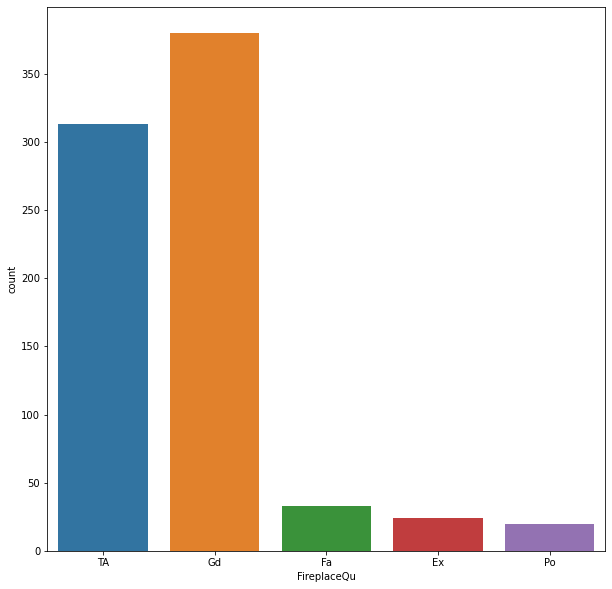

In [16]:
handle_missing_cat(df['FireplaceQu'])

<div class="alert alert-block alert-info">
Replacing null/NA values with NF : No Fireplace
</div>

In [17]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('NF')

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Percentage in missing 17.73972602739726
Mean: 

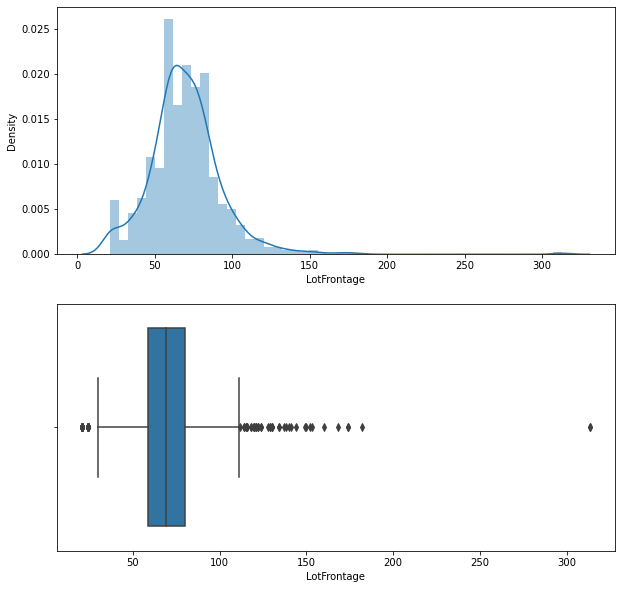

In [18]:
handle_missing_num(df['LotFrontage'])

<div class="alert alert-block alert-info">
Replacing null/NA values with median
</div>

In [19]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
Percentage in missing 0.547945205479452
Mode: 0    None
dtype: object


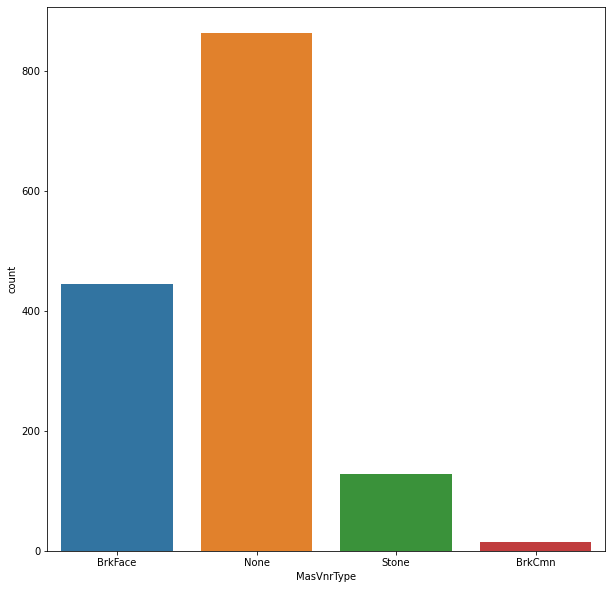

In [20]:
handle_missing_cat(df['MasVnrType'])

<div class="alert alert-block alert-info">
Replacing null/NA values with None
</div>

In [21]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')


count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64
[1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 1.200e+02 4.3

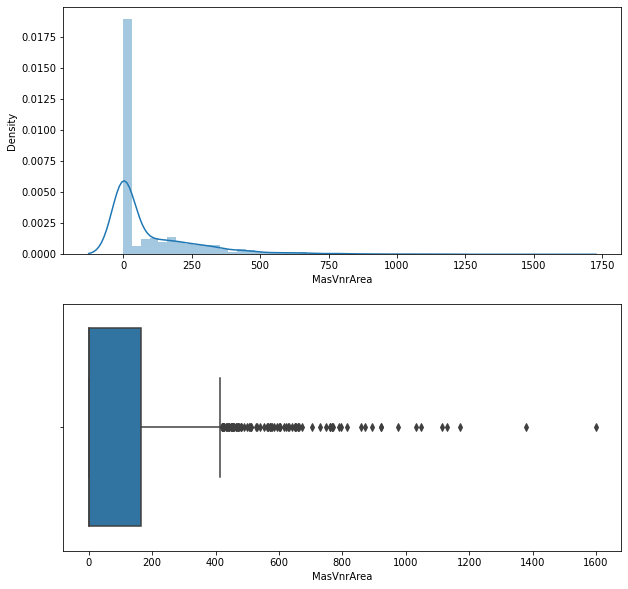

In [22]:
handle_missing_num(df['MasVnrArea'])

<div class="alert alert-block alert-info">
Replacing null/NA values with median
</div>

In [23]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
['Gd' 'TA' 'Ex' nan 'Fa']
Percentage in missing 2.5342465753424657
Mode: 0    TA
dtype: object


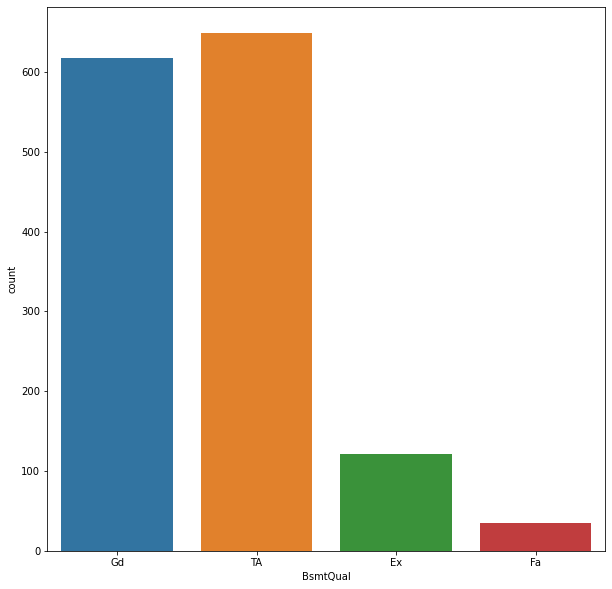

In [24]:
handle_missing_cat(df['BsmtQual'])

<div class="alert alert-block alert-info">
Replacing null/NA values with NB : No Basement
</div>

In [25]:
df['BsmtQual'] = df['BsmtQual'].fillna('NB')

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
['TA' 'Gd' nan 'Fa' 'Po']
Percentage in missing 2.5342465753424657
Mode: 0    TA
dtype: object


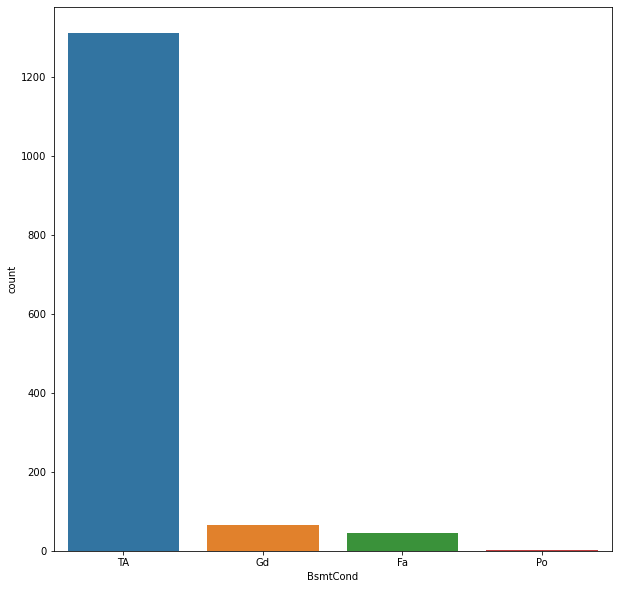

In [26]:
handle_missing_cat(df['BsmtCond'])

<div class="alert alert-block alert-info">
Replacing null/NA values with NB : No Basement
</div>

In [27]:
df['BsmtCond'] = df['BsmtCond'].fillna('NB')

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
['No' 'Gd' 'Mn' 'Av' nan]
Percentage in missing 2.6027397260273974
Mode: 0    No
dtype: object


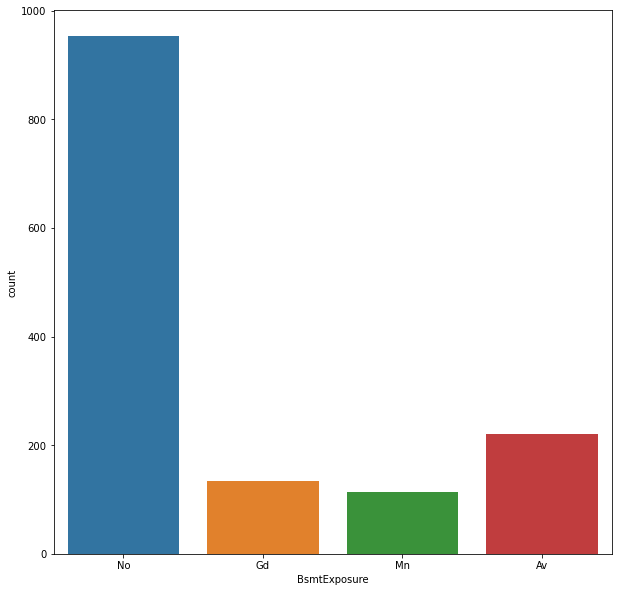

In [28]:
handle_missing_cat(df['BsmtExposure'])

<div class="alert alert-block alert-info">
Replacing null/NA values with NB : No Basement
</div>

In [29]:
df['BsmtExposure'] = df['BsmtExposure'].fillna('NB')

<div class="alert alert-block alert-info">
Replacing null/NA values with NB : No Basement
</div>

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
Percentage in missing 2.5342465753424657
Mode: 0    Unf
dtype: object


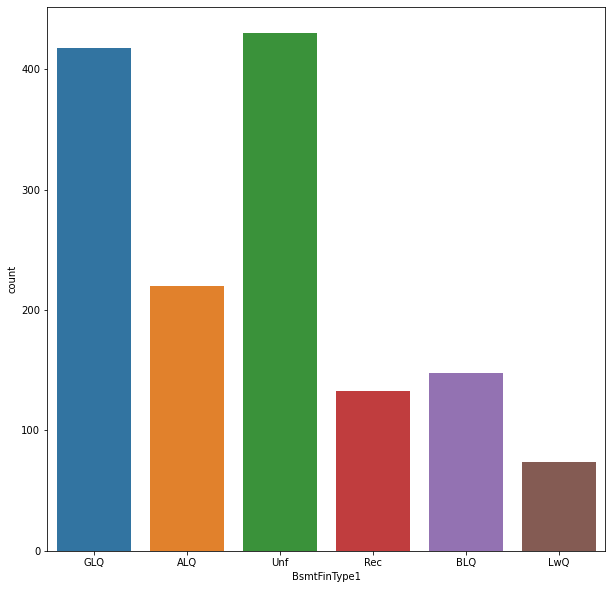

In [30]:
handle_missing_cat(df['BsmtFinType1'])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NB')

<div class="alert alert-block alert-info">
Replacing null/NA values with NB : No Basement
</div>

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Percentage in missing 2.6027397260273974
Mode: 0    Unf
dtype: object


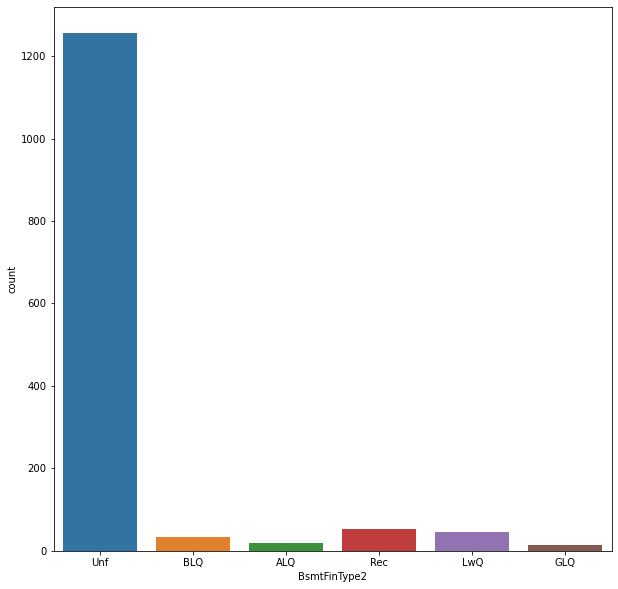

In [31]:
handle_missing_cat(df['BsmtFinType2'])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NB')

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
Percentage in missing 0.0684931506849315
Mode: 0    SBrkr
dtype: object


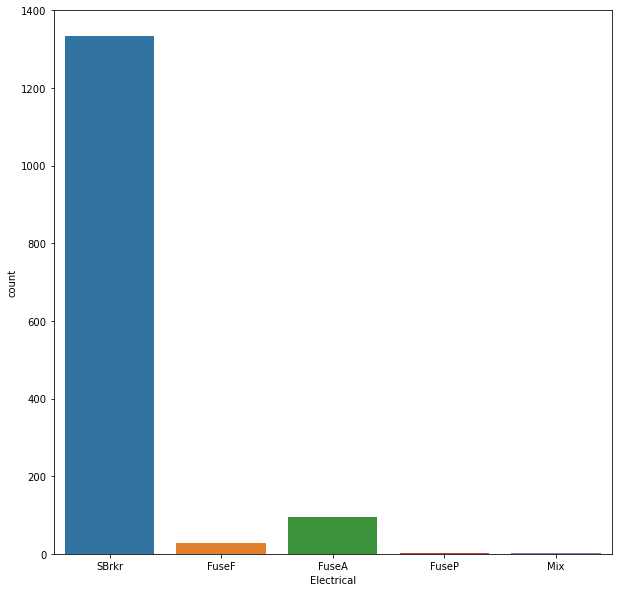

In [32]:
handle_missing_cat(df['Electrical'])

<div class="alert alert-block alert-info">
Replacing null/NA values with most repeating value
</div>

In [33]:
df['Electrical'] = df['Electrical'].fillna('SBrkr')

<div class="alert alert-block alert-info">
Replacing null/NA values with NG : No Garage
</div>

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
Percentage in missing 5.5479452054794525
Mode: 0    Attchd
dtype: object


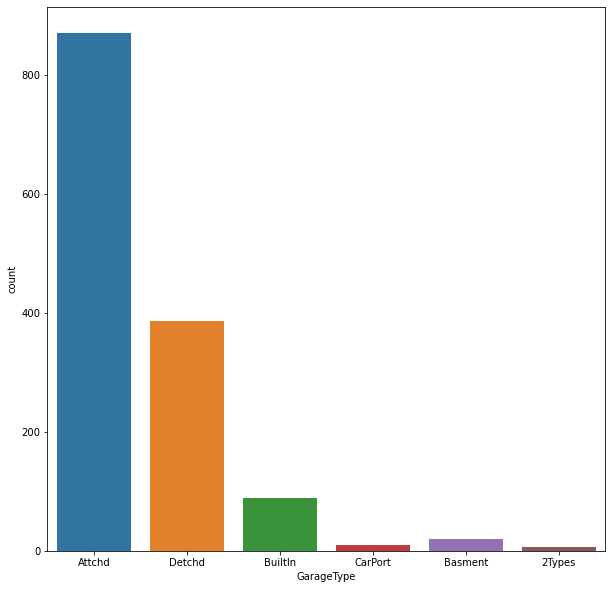

In [34]:
handle_missing_cat(df['GarageType'])
df['GarageType'] = df['GarageType'].fillna('NG')

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]
Percentage in

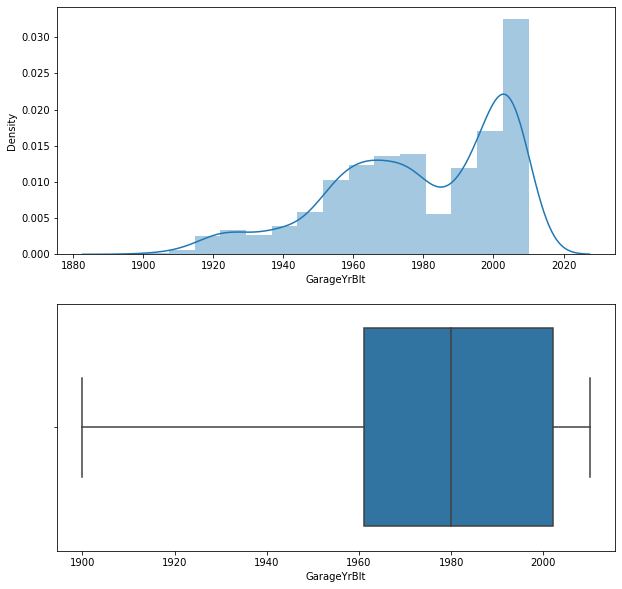

In [35]:
handle_missing_num(df['GarageYrBlt'])

<div class="alert alert-block alert-info">
Replacing null/NA values with mean
</div>

In [36]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(int(df['GarageYrBlt'].mean()))

<div class="alert alert-block alert-info">
Replacing null/NA values with NG : No Garage
</div>

count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
['RFn' 'Unf' 'Fin' nan]
Percentage in missing 5.5479452054794525
Mode: 0    Unf
dtype: object


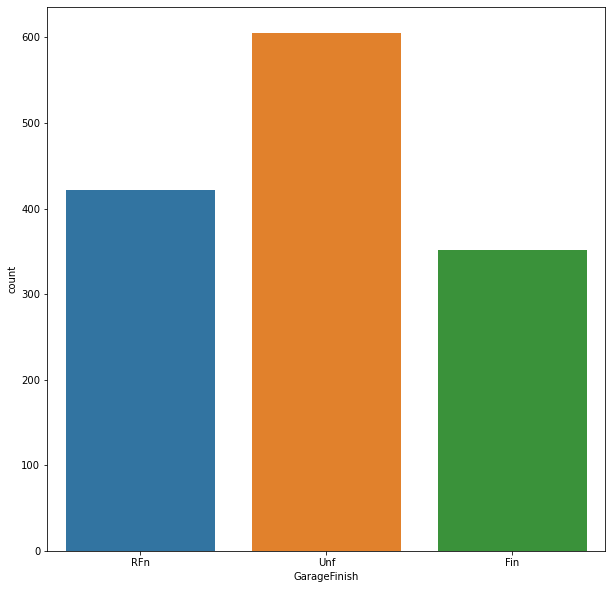

In [37]:
handle_missing_cat(df['GarageFinish'])
df['GarageFinish'] = df['GarageFinish'].fillna('NG')

<div class="alert alert-block alert-info">
Replacing null/NA values with NG : No Garage
</div>

count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
Percentage in missing 5.5479452054794525
Mode: 0    TA
dtype: object


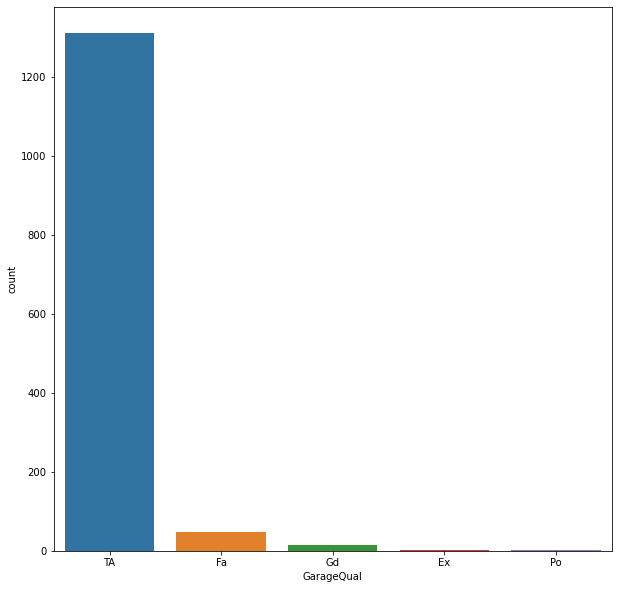

In [38]:
handle_missing_cat(df['GarageQual'])
df['GarageQual'] = df['GarageQual'].fillna('NG')

<div class="alert alert-block alert-info">
Replacing null/NA values with NG : No Garage
</div>

count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
Percentage in missing 5.5479452054794525
Mode: 0    TA
dtype: object


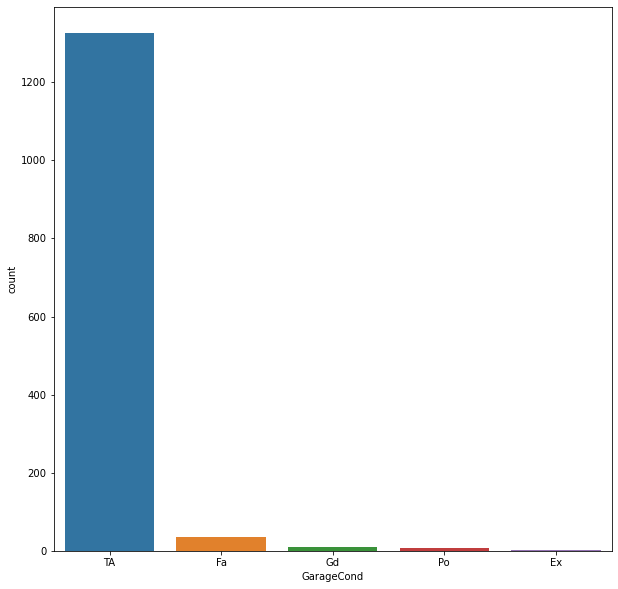

In [39]:
handle_missing_cat(df['GarageCond'])
df['GarageCond'] = df['GarageCond'].fillna('NG')

<div class="alert alert-block alert-info">
Handled Missing values
</div>

In [40]:
print("Missing values in terms of Percentage")

for column in df:
    percent = 100 - (df[column].count() / len(df))*100
    if percent > 0:
        print(column + ' has ' + str(percent) + "% missing values")

Missing values in terms of Percentage


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [42]:
df['MSSubClass'].head()

0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: int64

## Step 3: Visualising the Data

<div class="alert alert-block alert-info">
Converting numerical based values which may cause confusion to their original values from the data description
</div>

In [43]:
df['MSSubClass'] = df['MSSubClass'].replace({20:	'1-STORY 1946 & NEWER ALL STYLE',
                                    30:	'1-STORY 1945 & OLDE',
                                    40:	'1-STORY W/FINISHED ATTIC ALL AGE',
                                    45:	'1-1/2 STORY - UNFINISHED ALL AGE',
                                    50:	'1-1/2 STORY FINISHED ALL AGE',
                                    60:	'2-STORY 1946 & NEWE',
                                    70:	'2-STORY 1945 & OLDE',
                                    75:	'2-1/2 STORY ALL AGE',
                                    80:	'SPLIT OR MULTI-LEVE',
                                    85:	'SPLIT FOYE',
                                    90:	'DUPLEX - ALL STYLES AND AGE',
                                    120:	'1-STORY PUD (Planned Unit Development) - 1946 & NEWE',
                                    150:	'1-1/2 STORY PUD - ALL AGE',
                                    160:	'2-STORY PUD - 1946 & NEWE',
                                    180:	'PUD - MULTILEVEL - INCL SPLIT LEV/FOYE',
                                    190:	'2 FAMILY CONVERSION - ALL STYLES AND AGES'})


df['OverallQual'] = df['OverallQual'].replace({10:	'Very Excellent',
                                        9:	'Excellent',
                                        8:	'Very Good',
                                        7:	'Good',
                                        6:	'Above Average',
                                        5:	'Average',
                                        4:	'Below Average',
                                        3:	'Fair',
                                        2:	'Poor',
                                        1:	'Very Poor'
                                    })

df['OverallCond'] = df['OverallCond'].replace({10:	'Very Excellent',
                                        9:	'Excellent',
                                        8:	'Very Good',
                                        7:	'Good',
                                        6:	'Above Average',
                                        5:	'Average',
                                        4:	'Below Average',
                                        3:	'Fair',
                                        2:	'Poor',
                                        1:	'Very Poor'
                                    })

In [44]:
df['MSSubClass'].head()

0               2-STORY 1946 & NEWE
1    1-STORY 1946 & NEWER ALL STYLE
2               2-STORY 1946 & NEWE
3               2-STORY 1945 & OLDE
4               2-STORY 1946 & NEWE
Name: MSSubClass, dtype: object

In [45]:
df['OverallCond'].head()

0      Average
1    Very Good
2      Average
3      Average
4      Average
Name: OverallCond, dtype: object

In [46]:
df['OverallQual'].head()

0             Good
1    Above Average
2             Good
3             Good
4        Very Good
Name: OverallQual, dtype: object

In [47]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<div class="alert alert-block alert-info">
Distribution plot for target variable
</div>

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

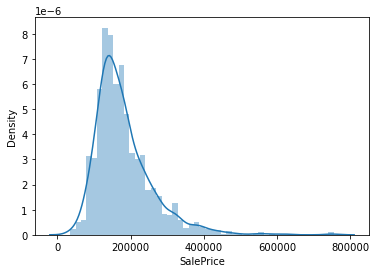

In [48]:
sns.distplot(df['SalePrice'])

<div class="alert alert-block alert-info">
Target variable is highly skewed
</div>

In [49]:
df['SalePrice'].skew()

1.8828757597682129

<div class="alert alert-block alert-info">
Applying log function in order to normally distribute the target variable
</div>

In [50]:
df['SalePrice'] = np.log(df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

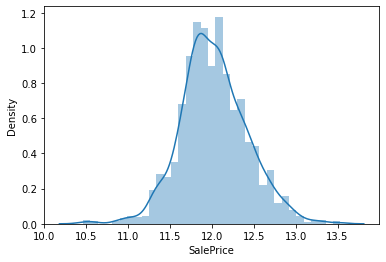

In [51]:
sns.distplot(df['SalePrice'])

In [52]:
df['SalePrice'].skew()

0.12133506220520406

In [53]:
df['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

<div class="alert alert-block alert-info">
Helper function to analyse categorical columns
</div>

In [54]:
def analyse_categorical(df,colname):
    
    print("Value Count for " + colname)
    print("\n")
    print(df[colname].value_counts())   
    print("-----------------------------------------------------")
    
    plt.figure(figsize=(10,20))
    
    plt.subplot(2,1,1)
    sns.countplot(df[colname])
    plt.xticks(rotation=90)
    
    plt.subplot(2,1,2)
    sns.boxplot(x= colname, y = 'SalePrice', data=df)
    plt.xticks(rotation=90)
    
    plt.show()

In [55]:
dtypes = df.dtypes.to_dict()

In [56]:
dtypes

{'MSSubClass': dtype('O'),
 'MSZoning': dtype('O'),
 'LotFrontage': dtype('float64'),
 'LotArea': dtype('int64'),
 'Street': dtype('O'),
 'LotShape': dtype('O'),
 'LandContour': dtype('O'),
 'Utilities': dtype('O'),
 'LotConfig': dtype('O'),
 'LandSlope': dtype('O'),
 'Neighborhood': dtype('O'),
 'Condition1': dtype('O'),
 'Condition2': dtype('O'),
 'BldgType': dtype('O'),
 'HouseStyle': dtype('O'),
 'OverallQual': dtype('O'),
 'OverallCond': dtype('O'),
 'YearBuilt': dtype('int64'),
 'YearRemodAdd': dtype('int64'),
 'RoofStyle': dtype('O'),
 'RoofMatl': dtype('O'),
 'Exterior1st': dtype('O'),
 'Exterior2nd': dtype('O'),
 'MasVnrType': dtype('O'),
 'MasVnrArea': dtype('float64'),
 'ExterQual': dtype('O'),
 'ExterCond': dtype('O'),
 'Foundation': dtype('O'),
 'BsmtQual': dtype('O'),
 'BsmtCond': dtype('O'),
 'BsmtExposure': dtype('O'),
 'BsmtFinType1': dtype('O'),
 'BsmtFinSF1': dtype('int64'),
 'BsmtFinType2': dtype('O'),
 'BsmtFinSF2': dtype('int64'),
 'BsmtUnfSF': dtype('int64'),
 'T

In [57]:
print(df.select_dtypes(include=['object']).columns)

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [58]:
print(len(df.select_dtypes(include=['object']).columns))


42


In [59]:
cat_cols = df.select_dtypes(include=['object']).columns

<div class="alert alert-block alert-info">
Analysis for all categorical data
</div>

Value Count for MSSubClass


1-STORY 1946 & NEWER ALL STYLE                          536
2-STORY 1946 & NEWE                                     299
1-1/2 STORY FINISHED ALL AGE                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWE     87
1-STORY 1945 & OLDE                                      69
2-STORY PUD - 1946 & NEWE                                63
2-STORY 1945 & OLDE                                      60
SPLIT OR MULTI-LEVE                                      58
DUPLEX - ALL STYLES AND AGE                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                30
SPLIT FOYE                                               20
2-1/2 STORY ALL AGE                                      16
1-1/2 STORY - UNFINISHED ALL AGE                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYE                   10
1-STORY W/FINISHED ATTIC ALL AGE                          4
Name: MSSubClass, dtype: int64
----------------------------------------

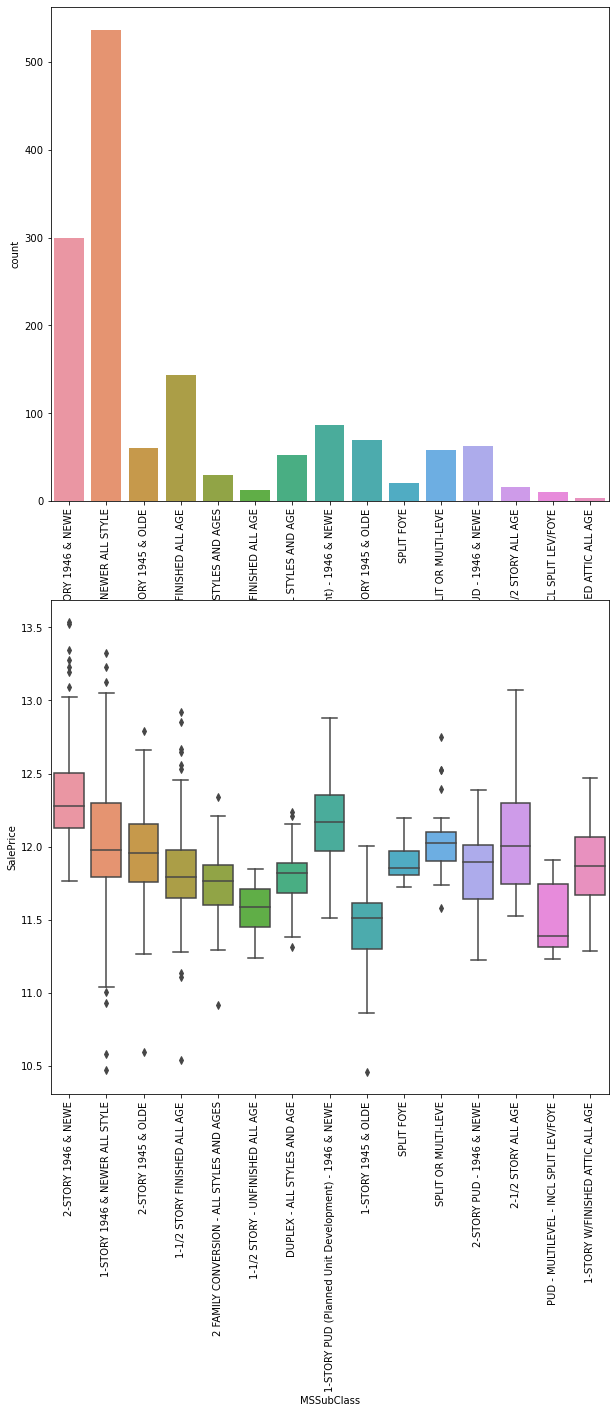

Value Count for MSZoning


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
-----------------------------------------------------


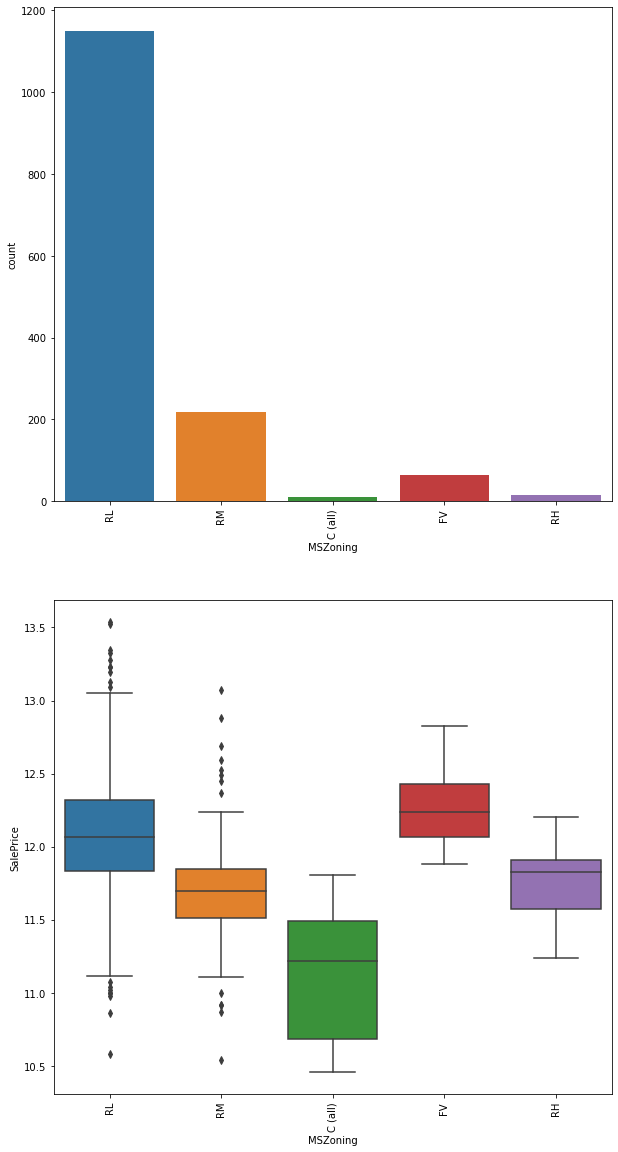

Value Count for Street


Pave    1454
Grvl       6
Name: Street, dtype: int64
-----------------------------------------------------


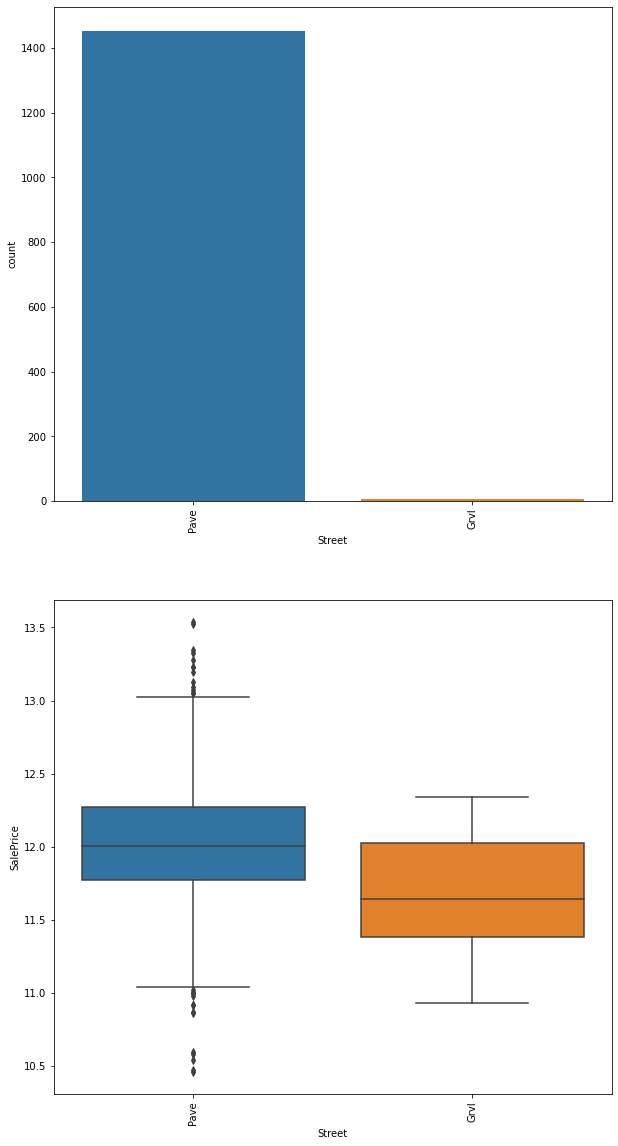

Value Count for LotShape


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
-----------------------------------------------------


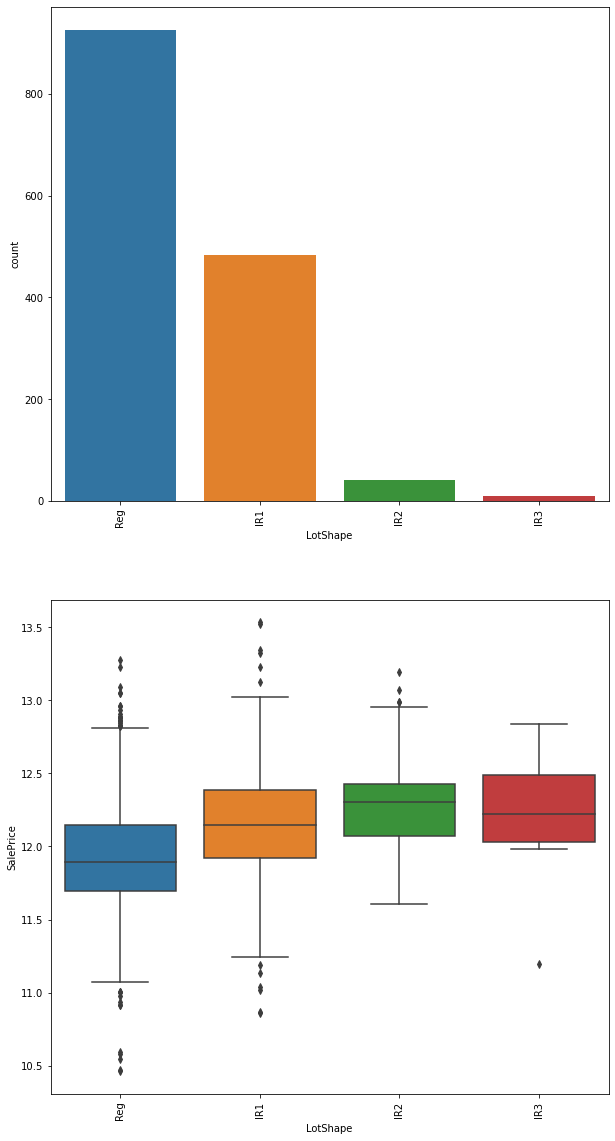

Value Count for LandContour


Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
-----------------------------------------------------


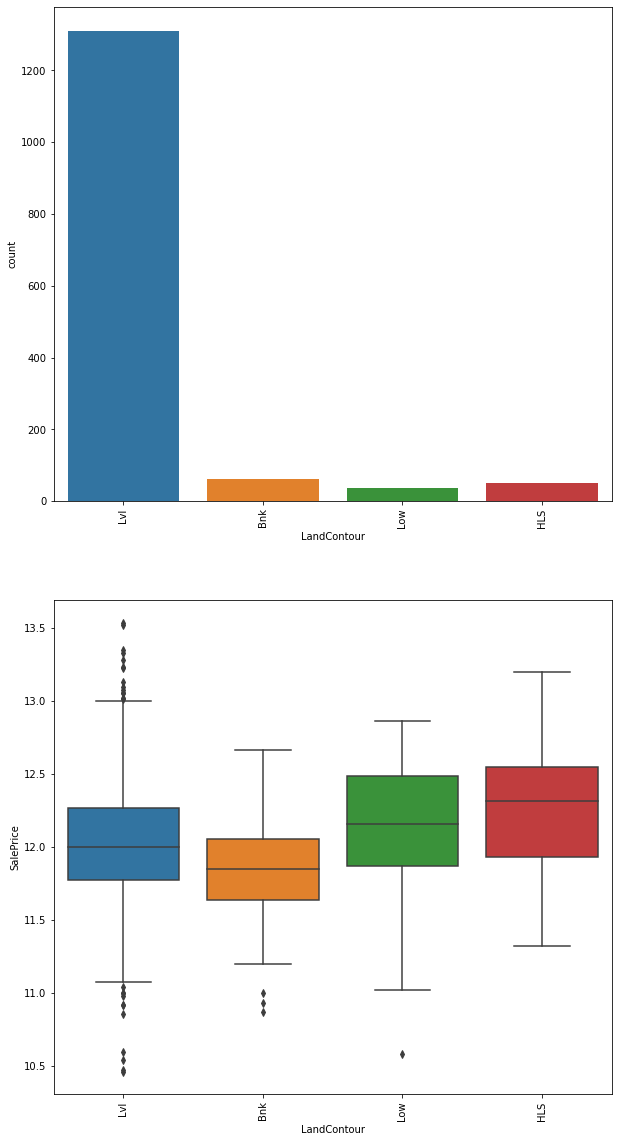

Value Count for Utilities


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
-----------------------------------------------------


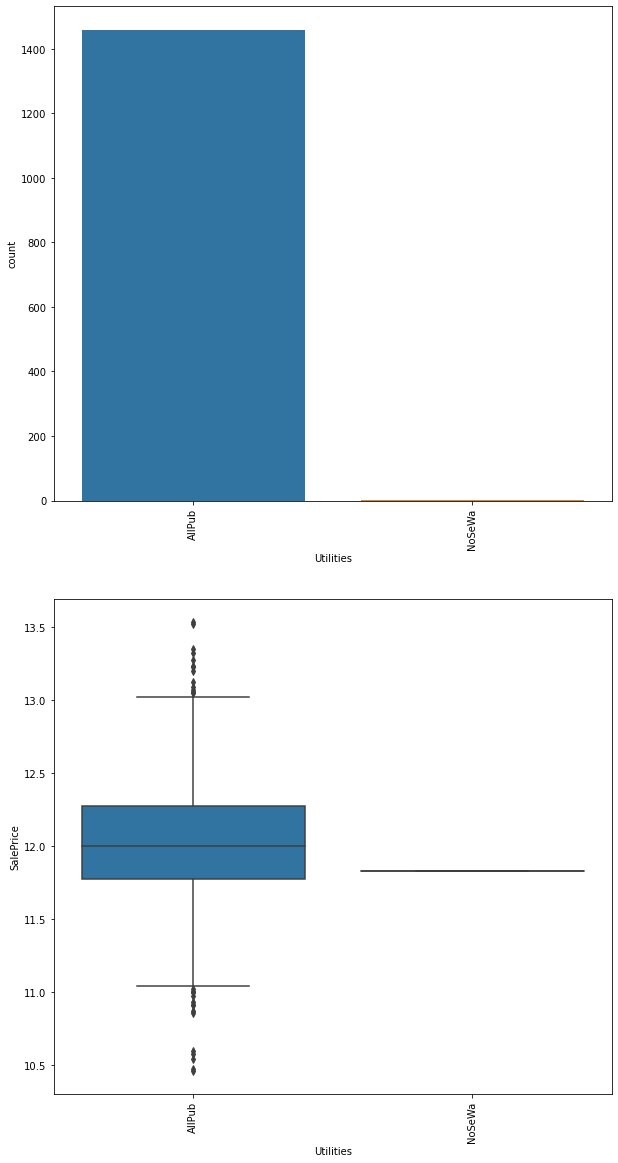

Value Count for LotConfig


Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
-----------------------------------------------------


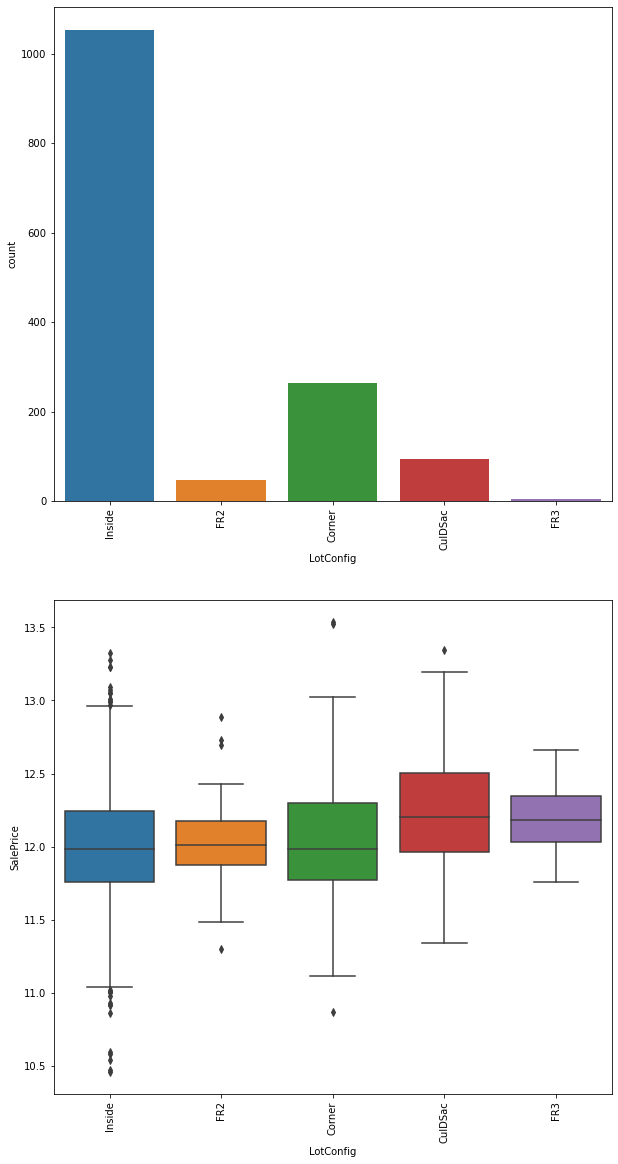

Value Count for LandSlope


Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
-----------------------------------------------------


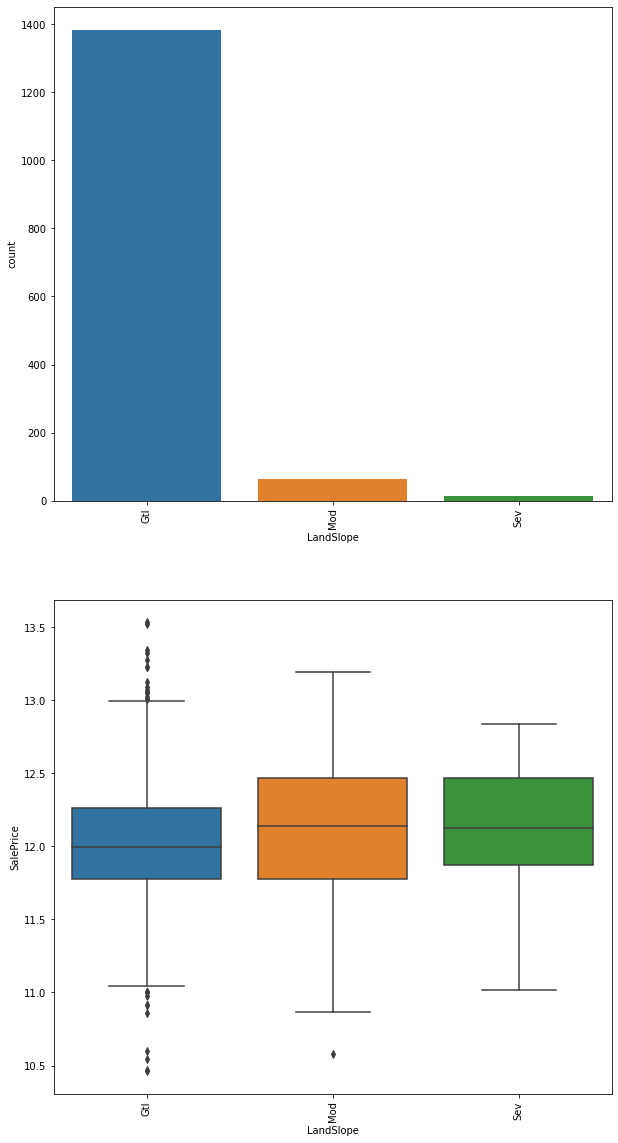

Value Count for Neighborhood


NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
-----------------------------------------------------


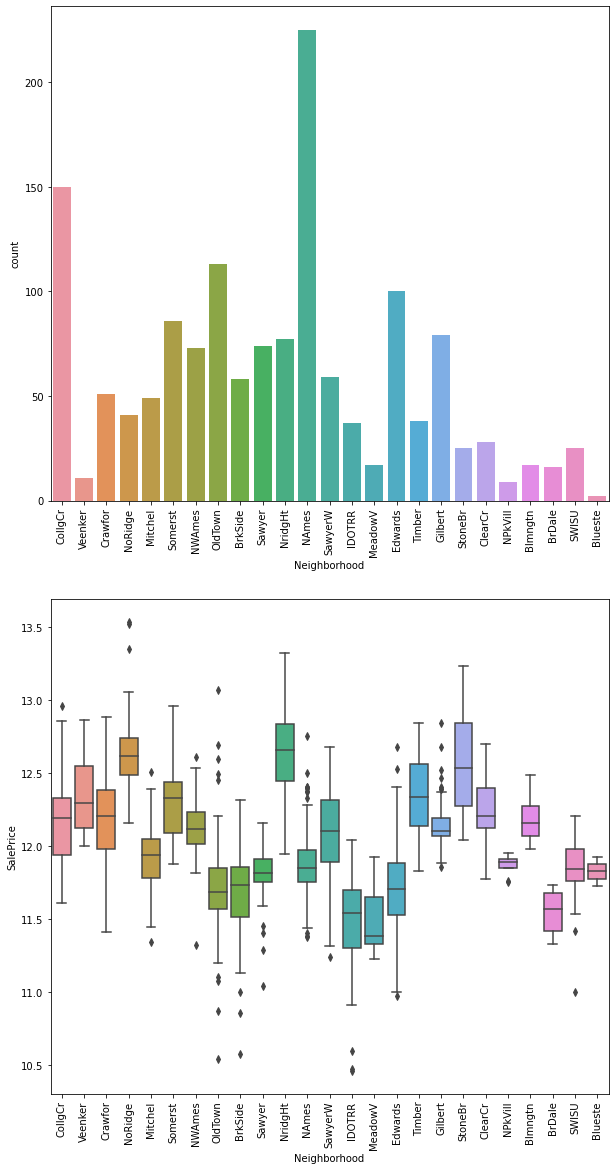

Value Count for Condition1


Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
-----------------------------------------------------


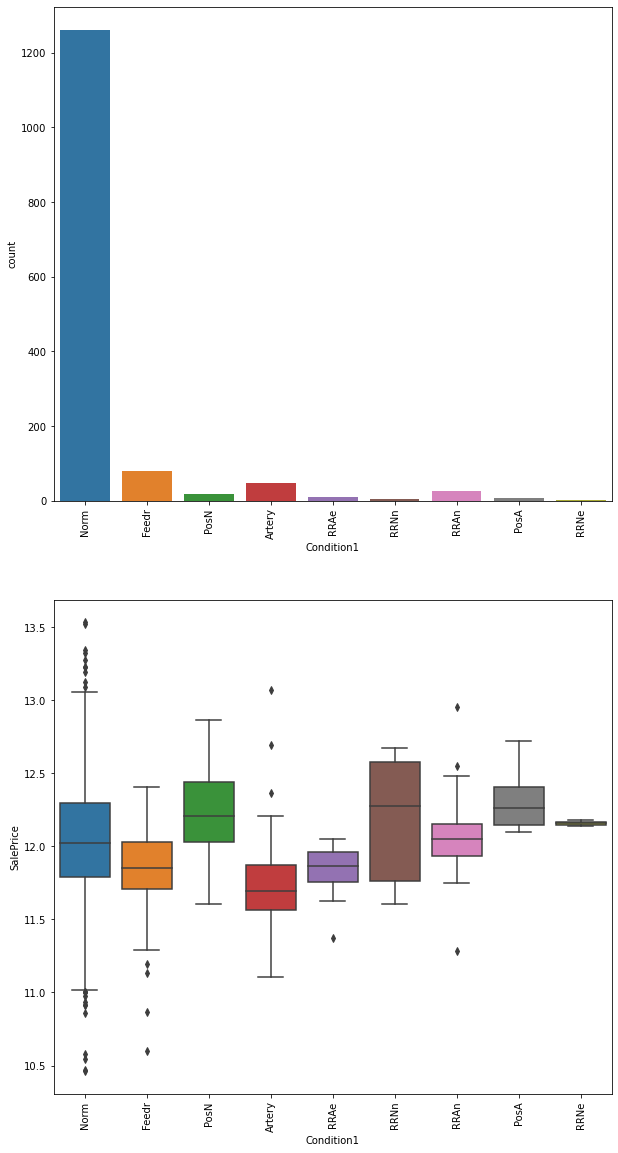

Value Count for Condition2


Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64
-----------------------------------------------------


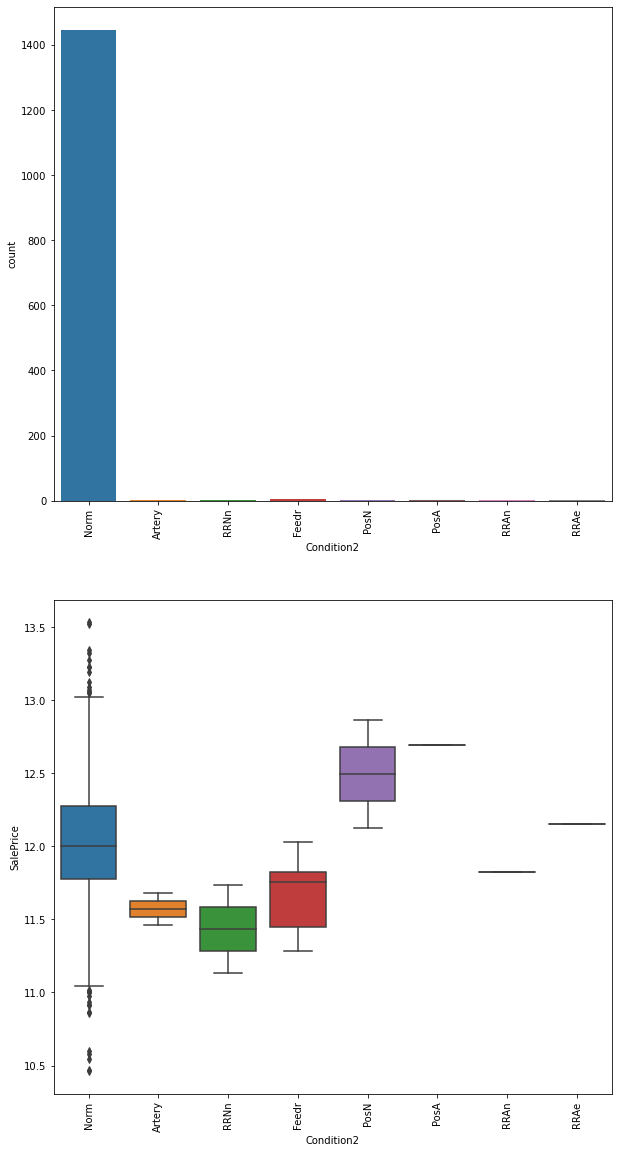

Value Count for BldgType


1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
-----------------------------------------------------


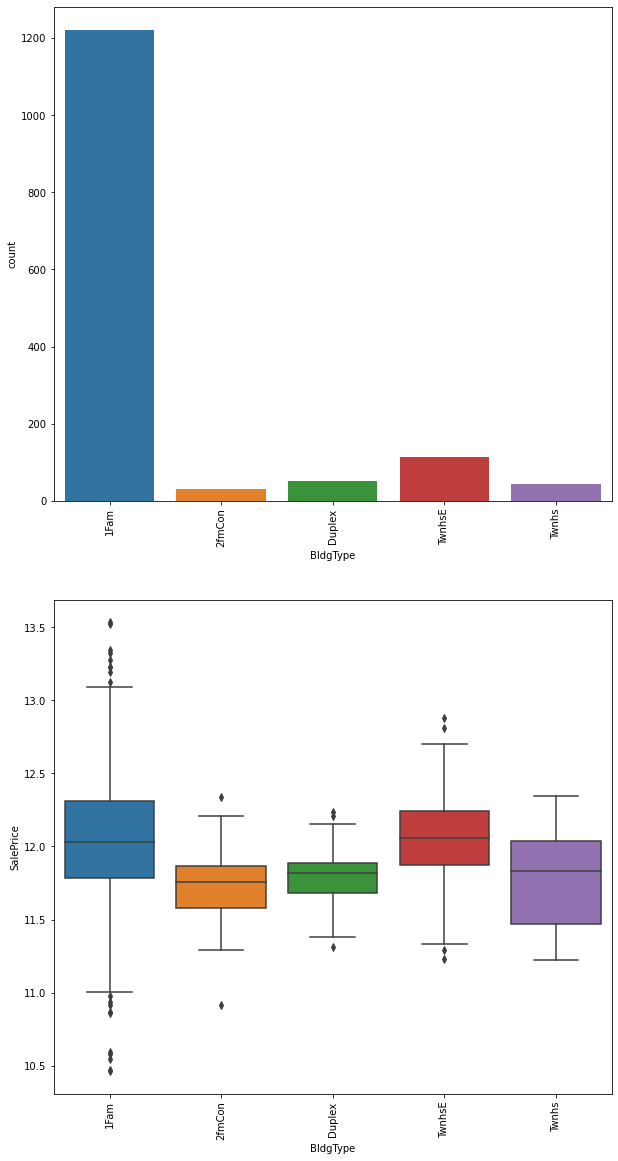

Value Count for HouseStyle


1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
-----------------------------------------------------


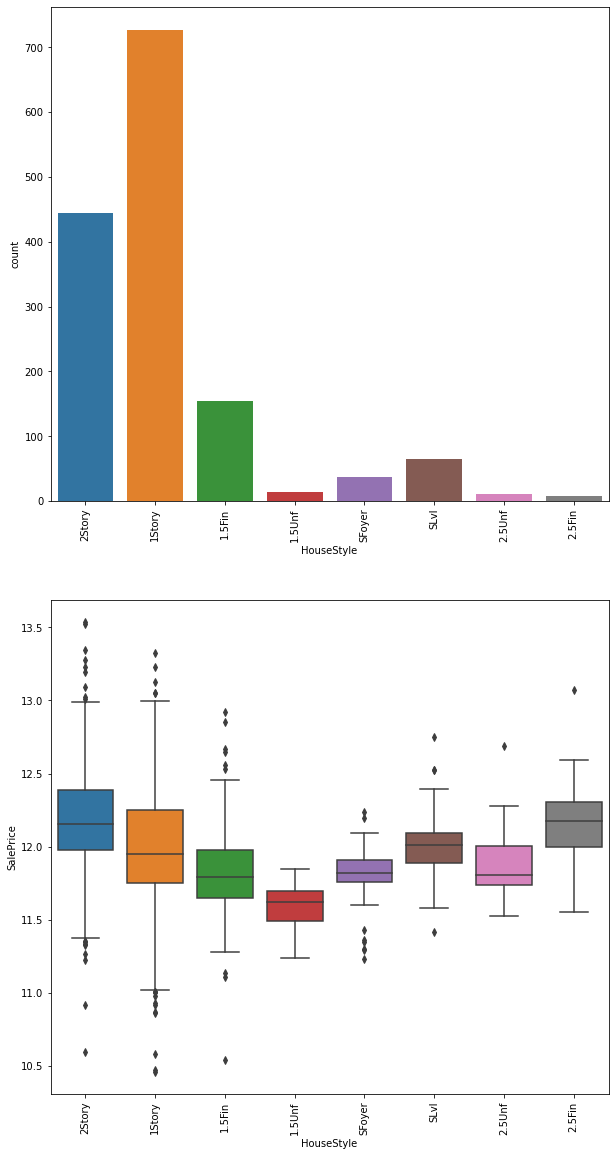

Value Count for OverallQual


Average           397
Above Average     374
Good              319
Very Good         168
Below Average     116
Excellent          43
Fair               20
Very Excellent     18
Poor                3
Very Poor           2
Name: OverallQual, dtype: int64
-----------------------------------------------------


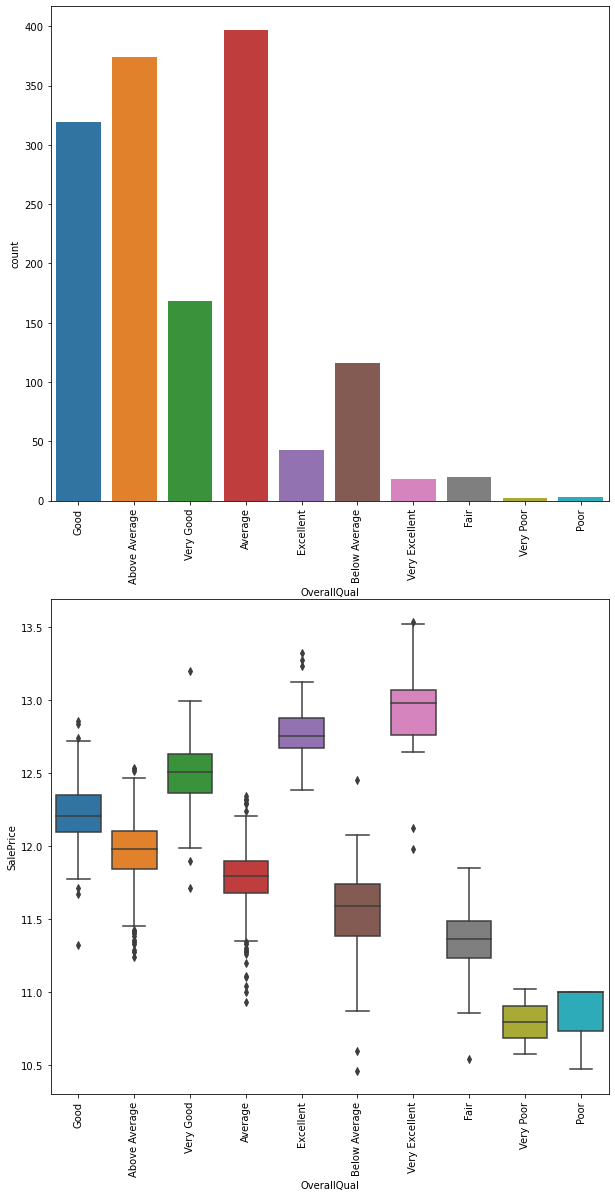

Value Count for OverallCond


Average          821
Above Average    252
Good             205
Very Good         72
Below Average     57
Fair              25
Excellent         22
Poor               5
Very Poor          1
Name: OverallCond, dtype: int64
-----------------------------------------------------


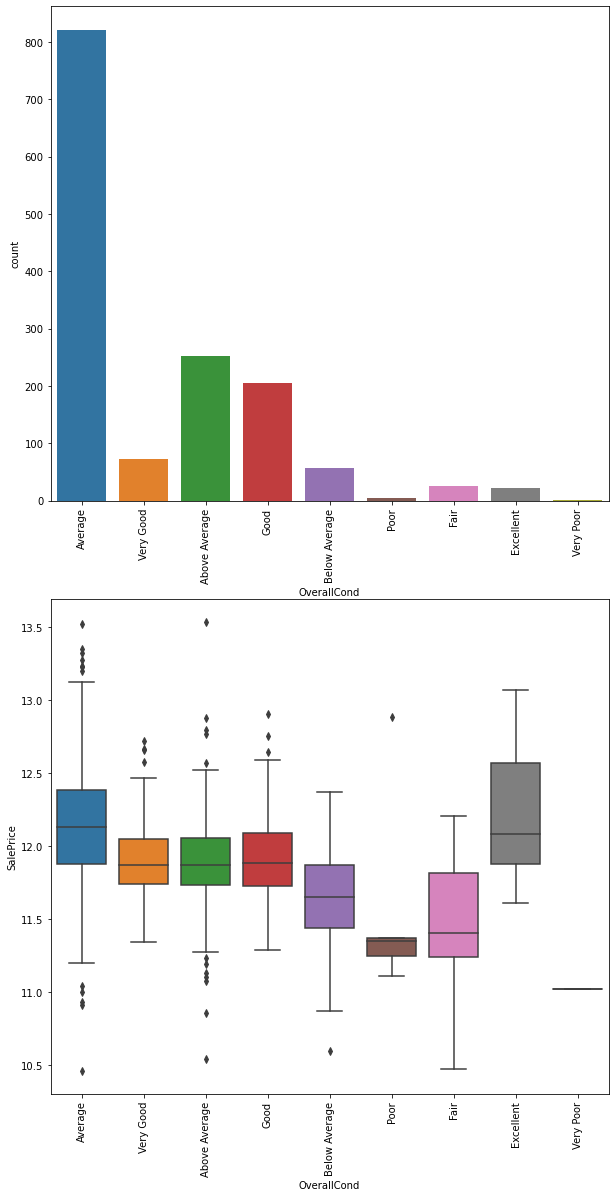

Value Count for RoofStyle


Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
-----------------------------------------------------


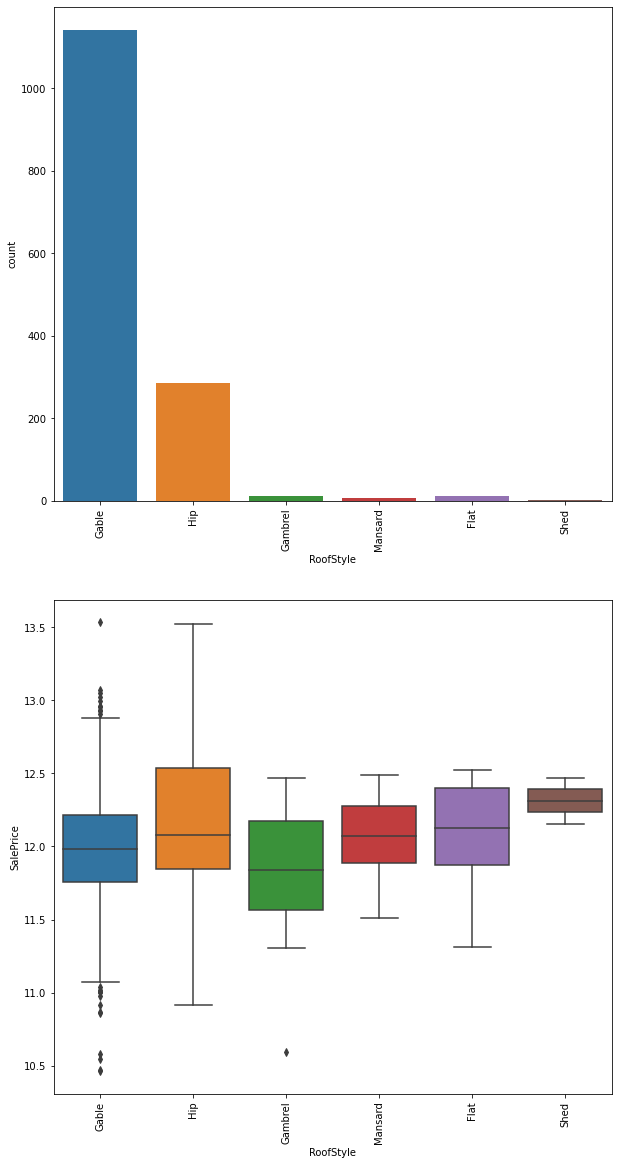

Value Count for RoofMatl


CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64
-----------------------------------------------------


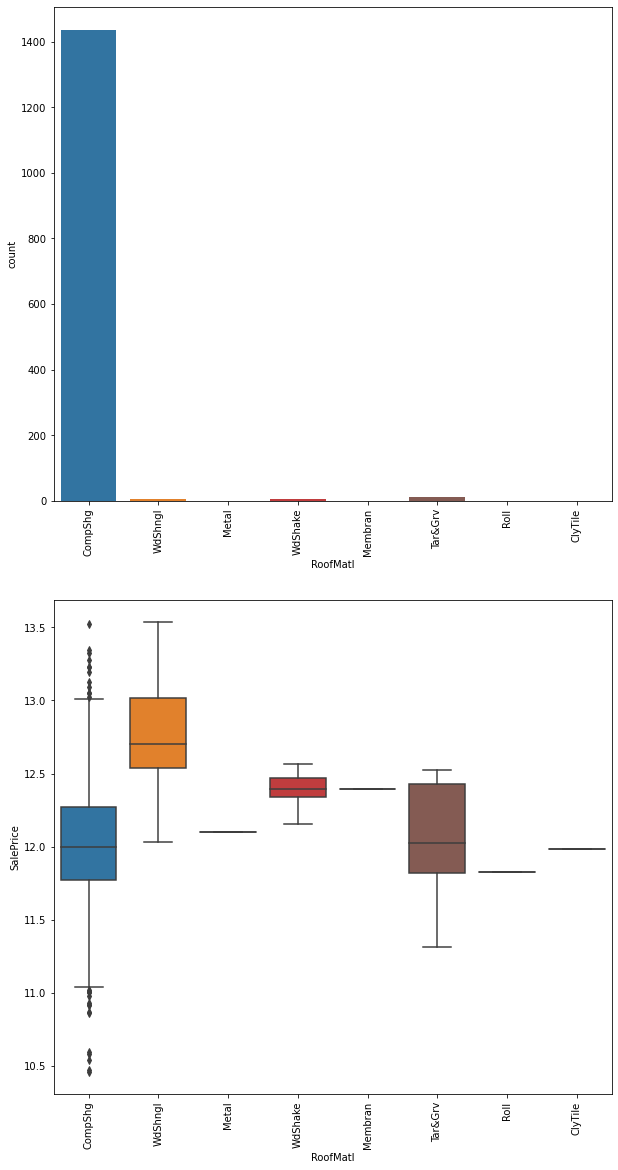

Value Count for Exterior1st


VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64
-----------------------------------------------------


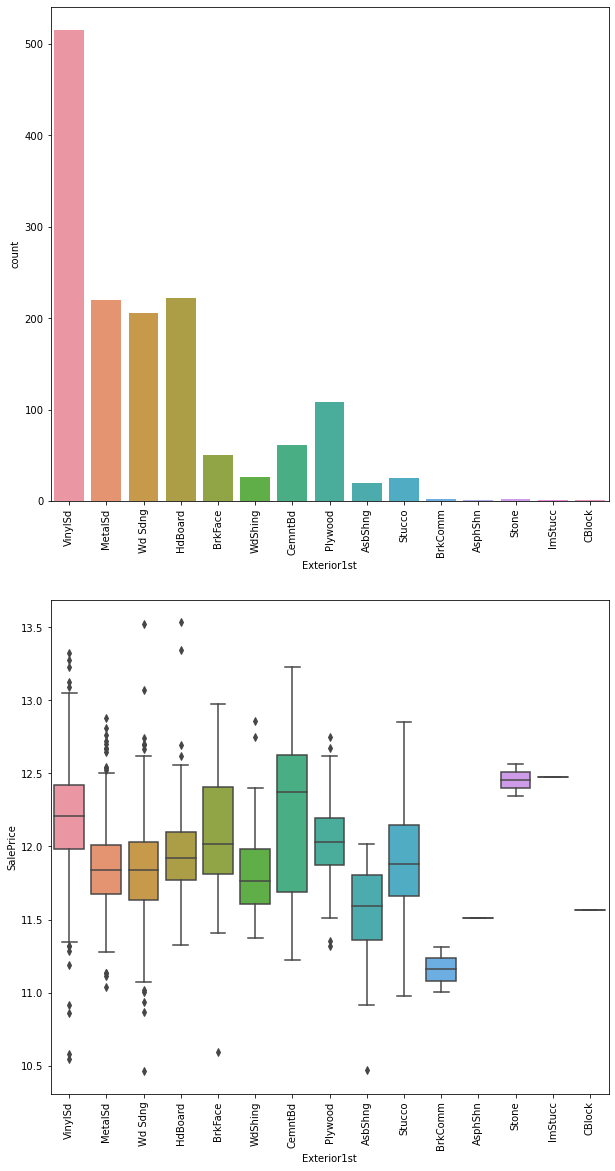

Value Count for Exterior2nd


VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64
-----------------------------------------------------


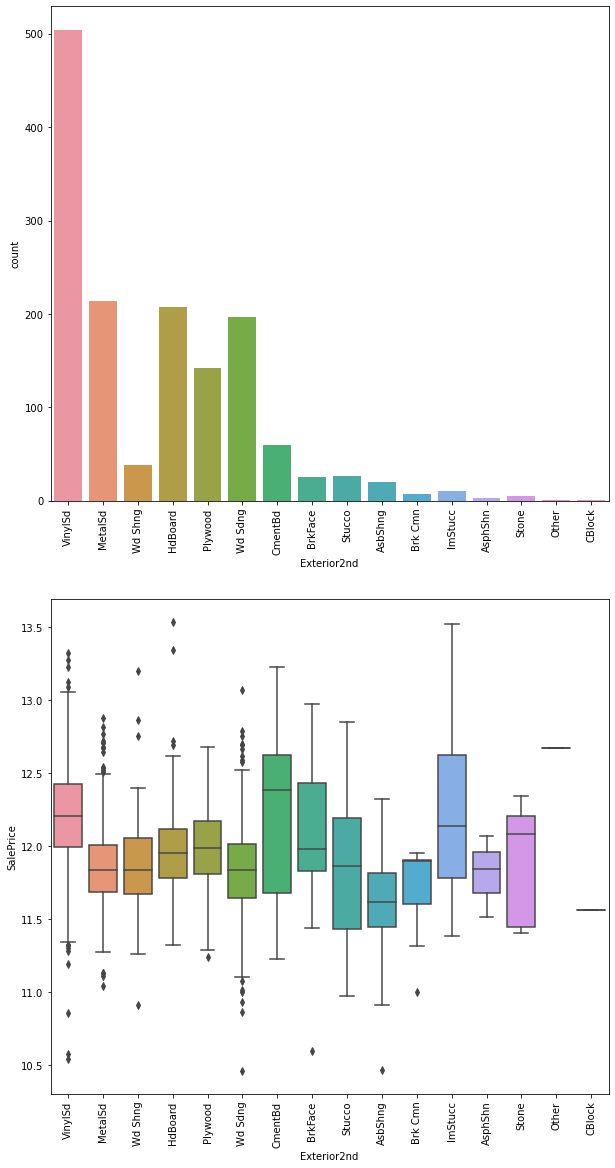

Value Count for MasVnrType


None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
-----------------------------------------------------


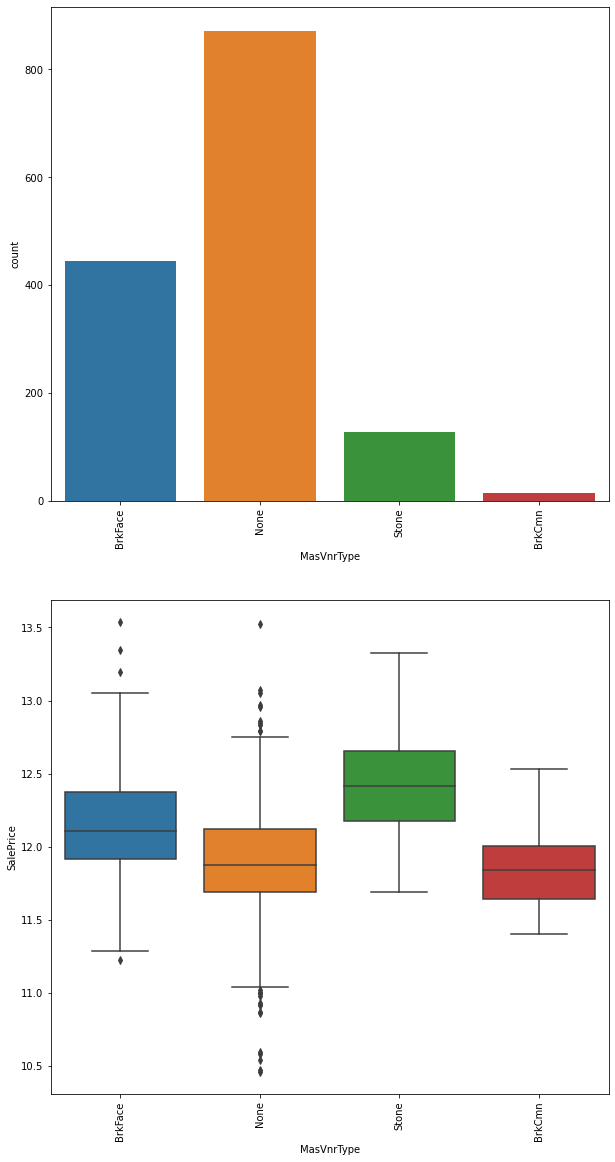

Value Count for ExterQual


TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
-----------------------------------------------------


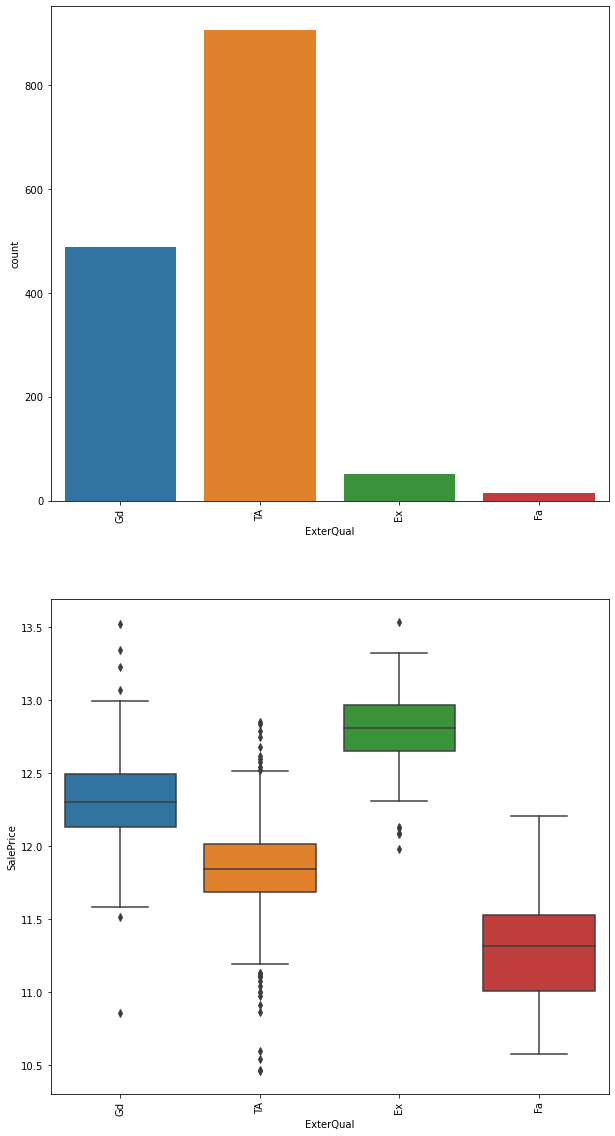

Value Count for ExterCond


TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
-----------------------------------------------------


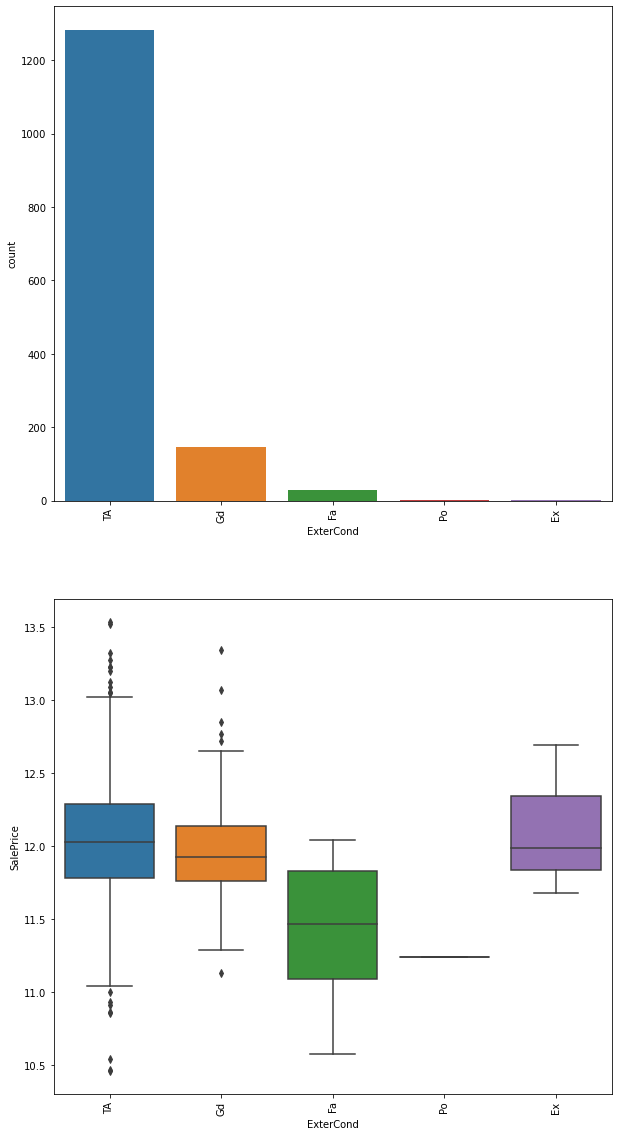

Value Count for Foundation


PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
-----------------------------------------------------


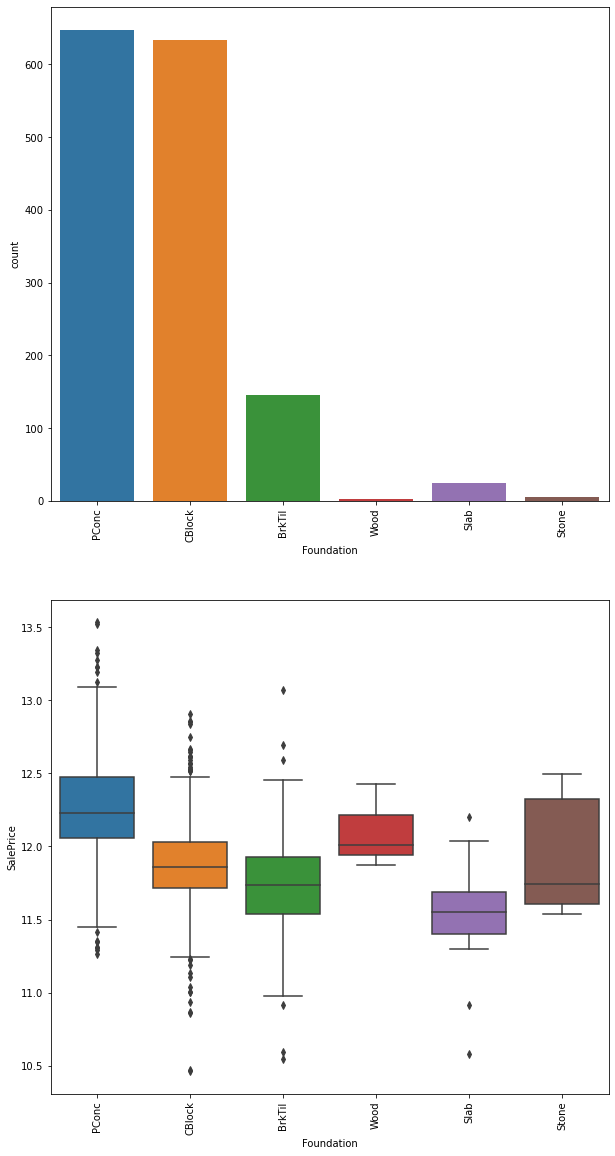

Value Count for BsmtQual


TA    649
Gd    618
Ex    121
NB     37
Fa     35
Name: BsmtQual, dtype: int64
-----------------------------------------------------


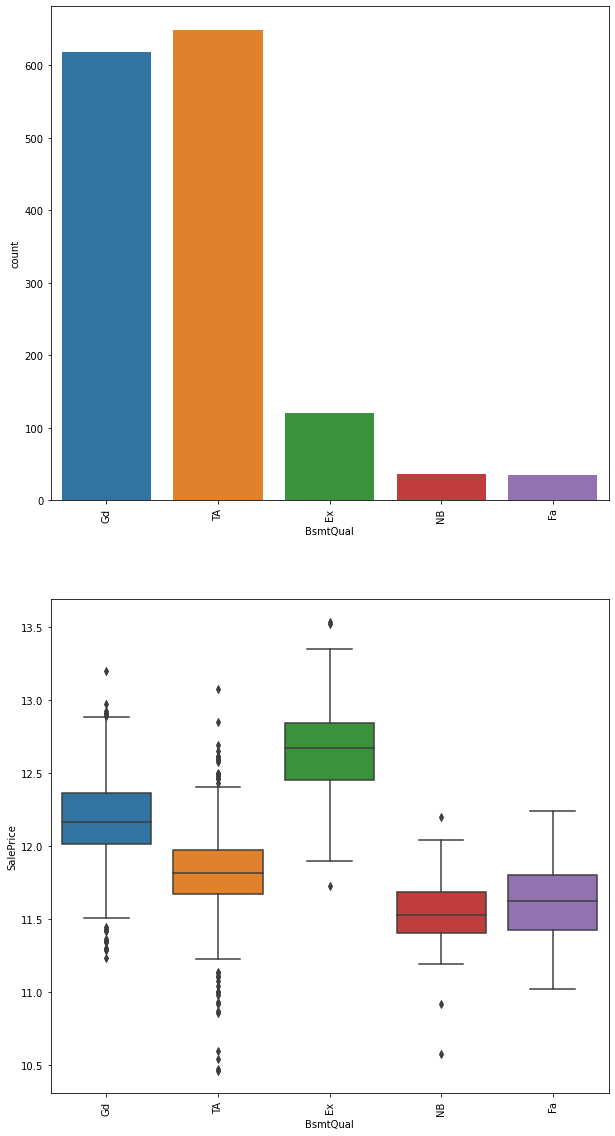

Value Count for BsmtCond


TA    1311
Gd      65
Fa      45
NB      37
Po       2
Name: BsmtCond, dtype: int64
-----------------------------------------------------


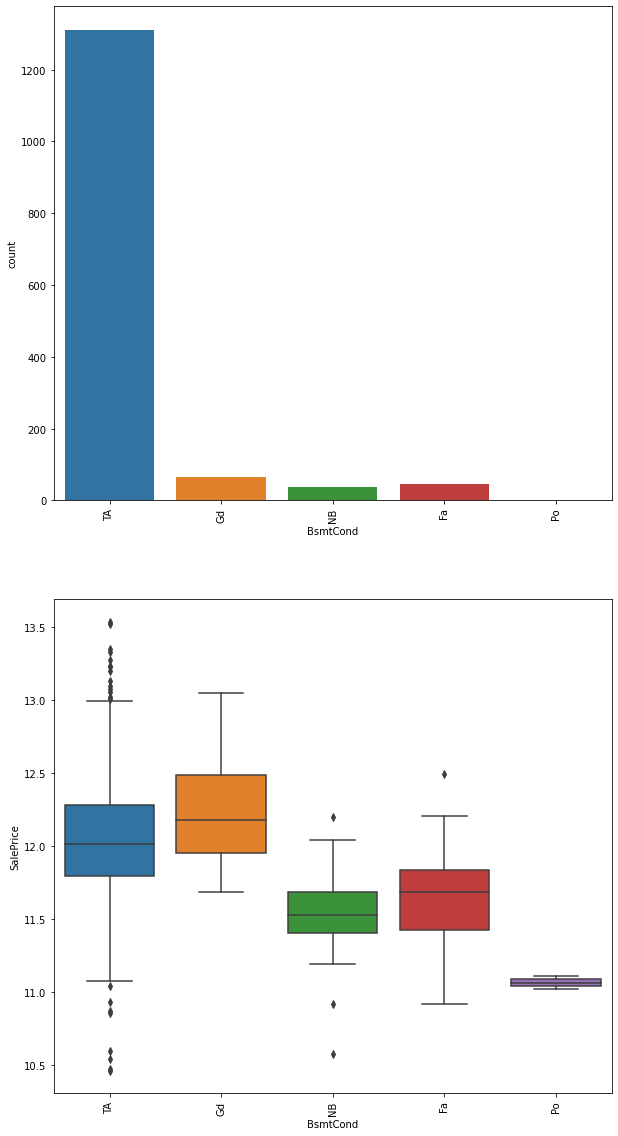

Value Count for BsmtExposure


No    953
Av    221
Gd    134
Mn    114
NB     38
Name: BsmtExposure, dtype: int64
-----------------------------------------------------


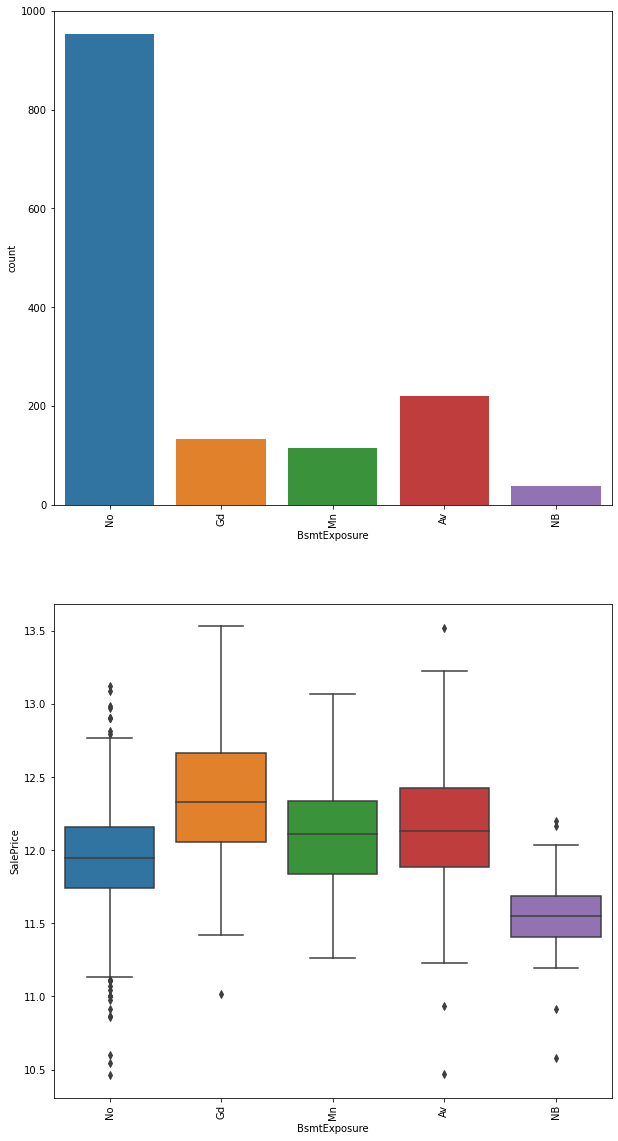

Value Count for BsmtFinType1


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NB      37
Name: BsmtFinType1, dtype: int64
-----------------------------------------------------


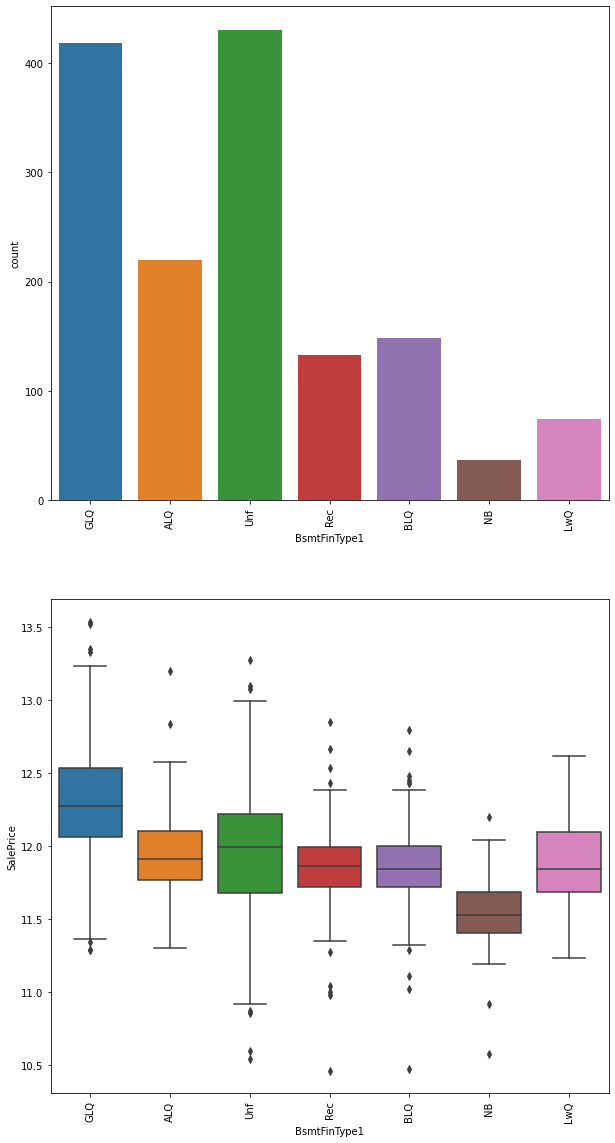

Value Count for BsmtFinType2


Unf    1256
Rec      54
LwQ      46
NB       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
-----------------------------------------------------


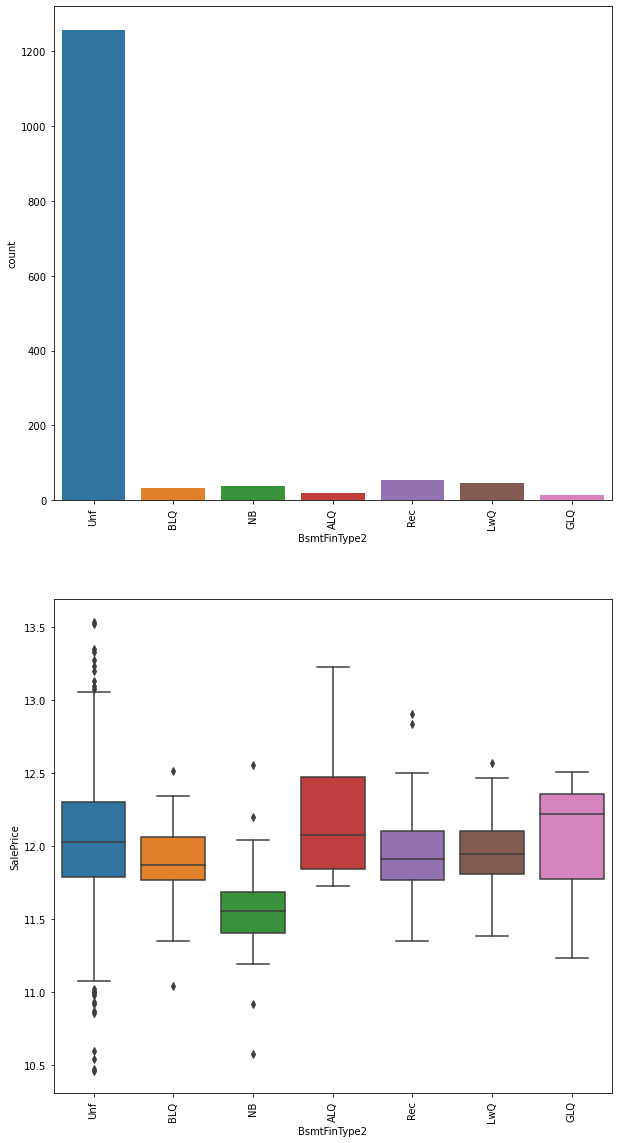

Value Count for Heating


GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
-----------------------------------------------------


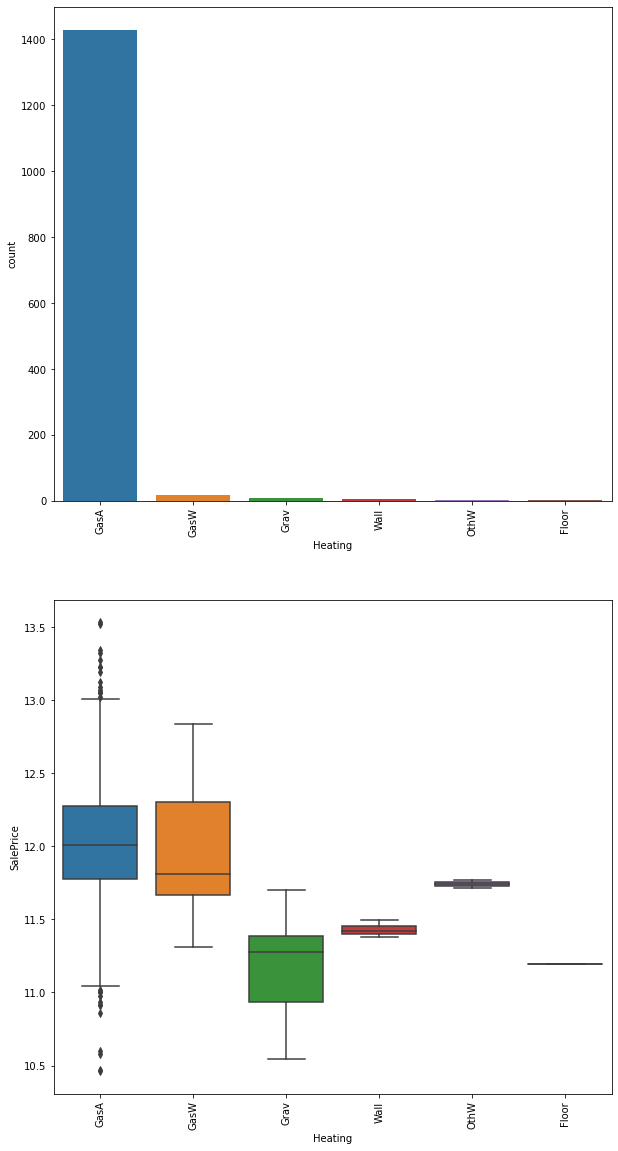

Value Count for HeatingQC


Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
-----------------------------------------------------


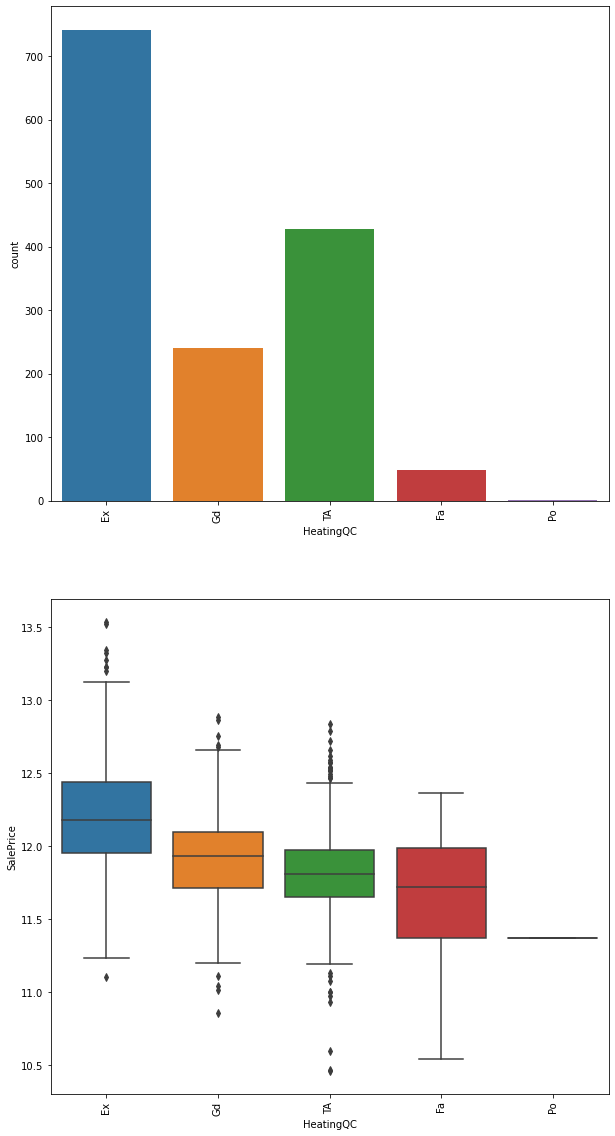

Value Count for CentralAir


Y    1365
N      95
Name: CentralAir, dtype: int64
-----------------------------------------------------


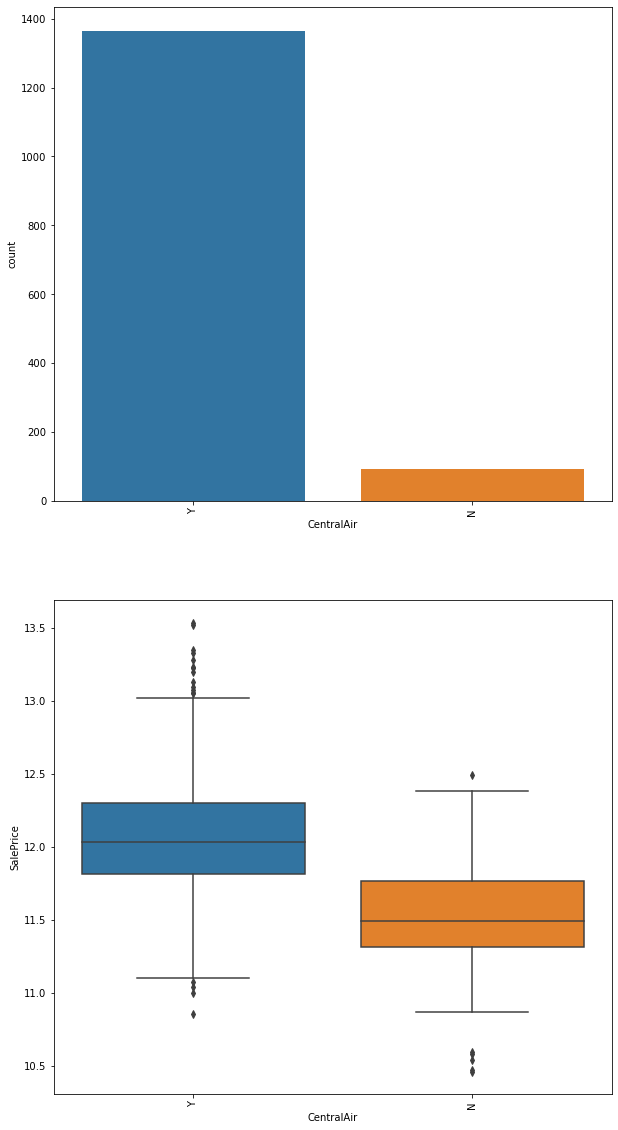

Value Count for Electrical


SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
-----------------------------------------------------


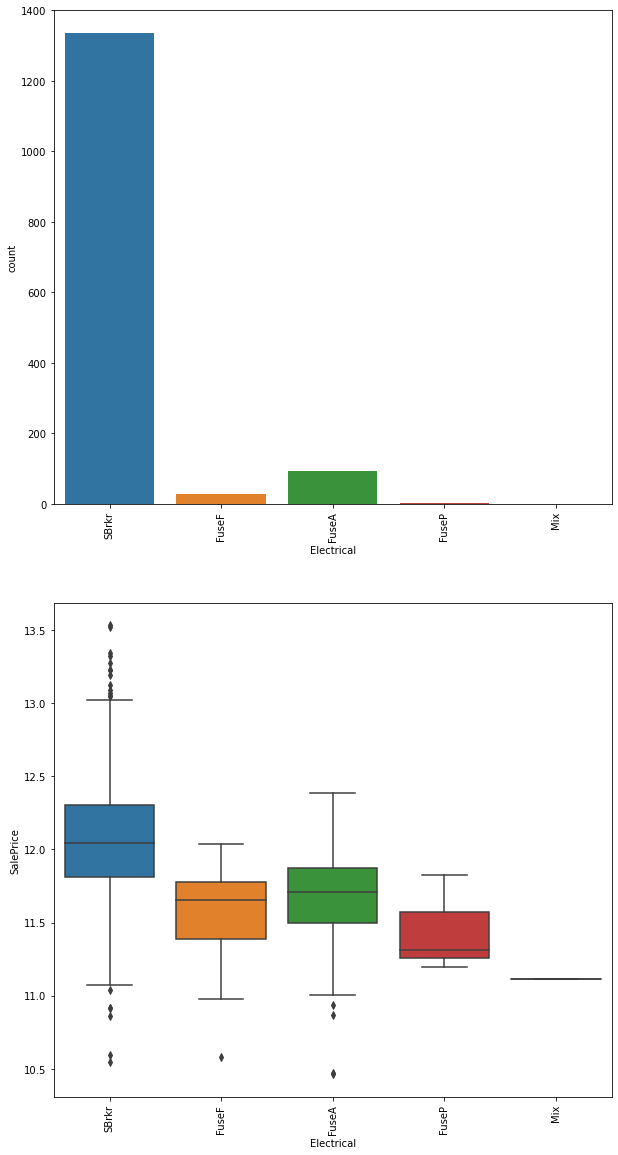

Value Count for KitchenQual


TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
-----------------------------------------------------


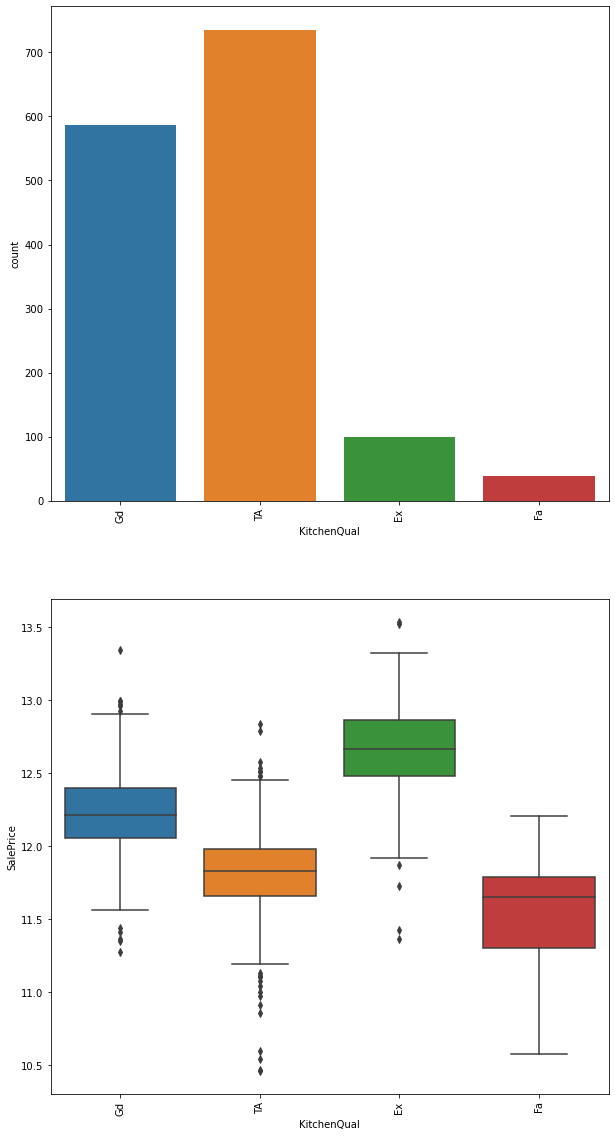

Value Count for Functional


Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64
-----------------------------------------------------


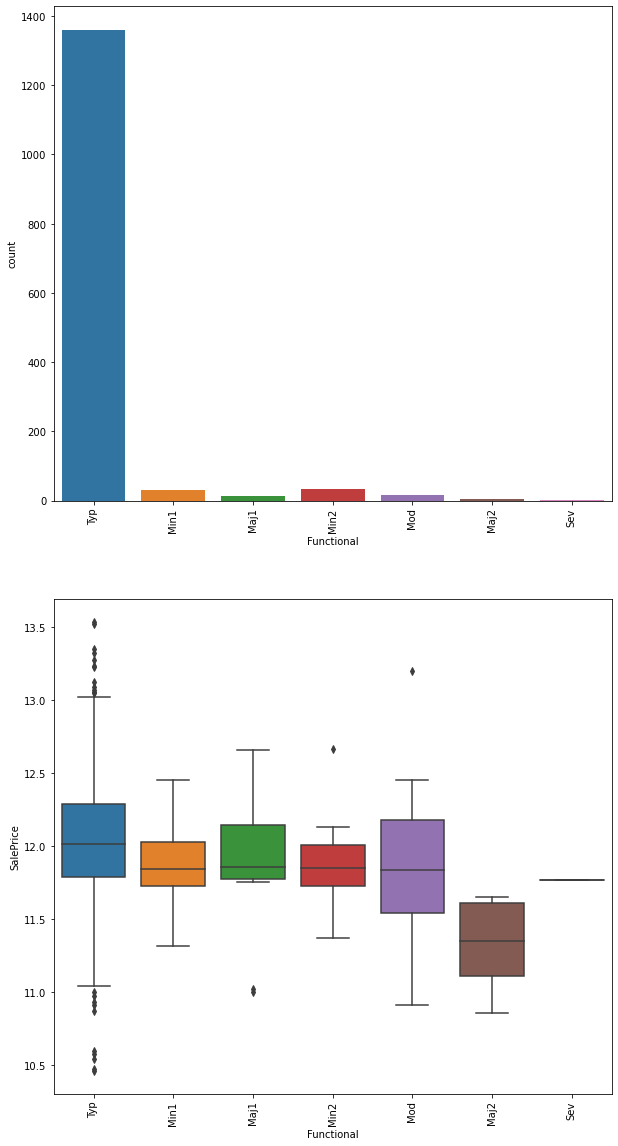

Value Count for FireplaceQu


NF    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
-----------------------------------------------------


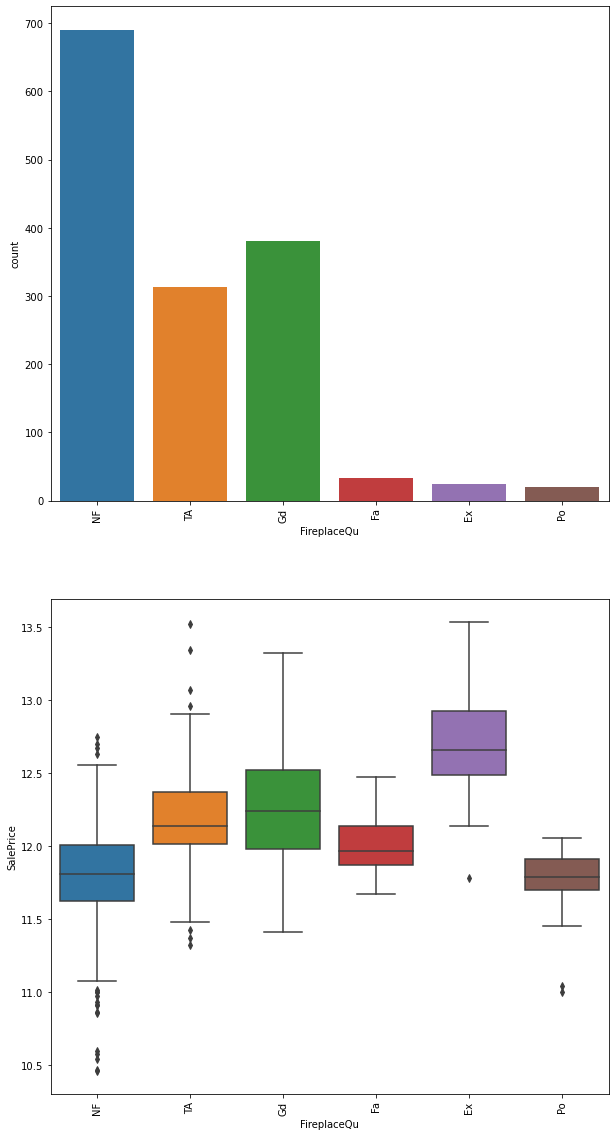

Value Count for GarageType


Attchd     870
Detchd     387
BuiltIn     88
NG          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
-----------------------------------------------------


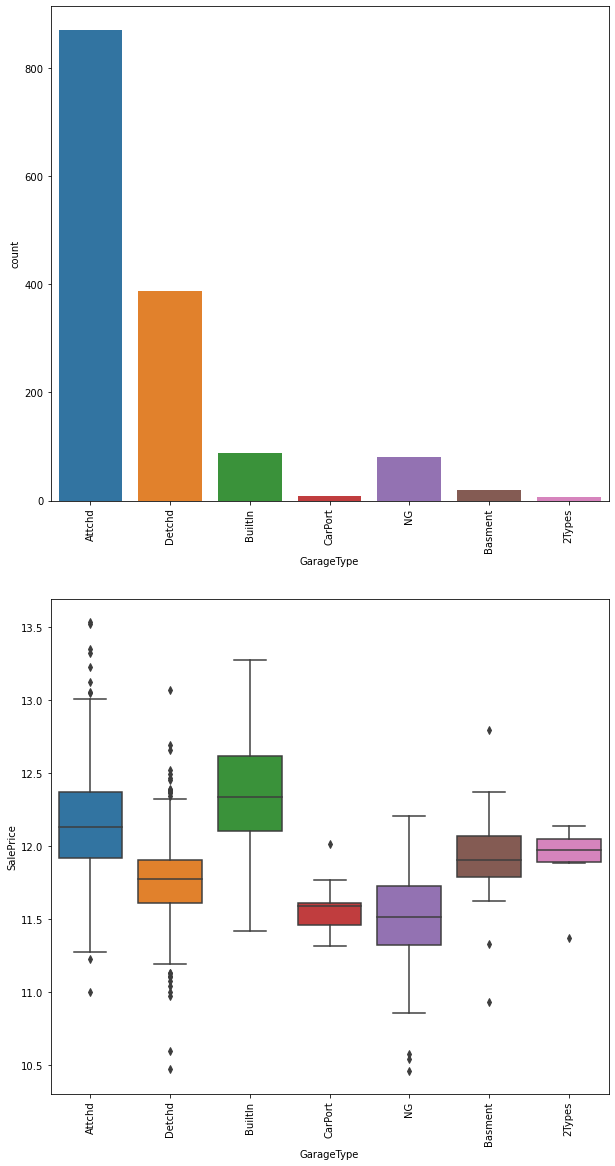

Value Count for GarageFinish


Unf    605
RFn    422
Fin    352
NG      81
Name: GarageFinish, dtype: int64
-----------------------------------------------------


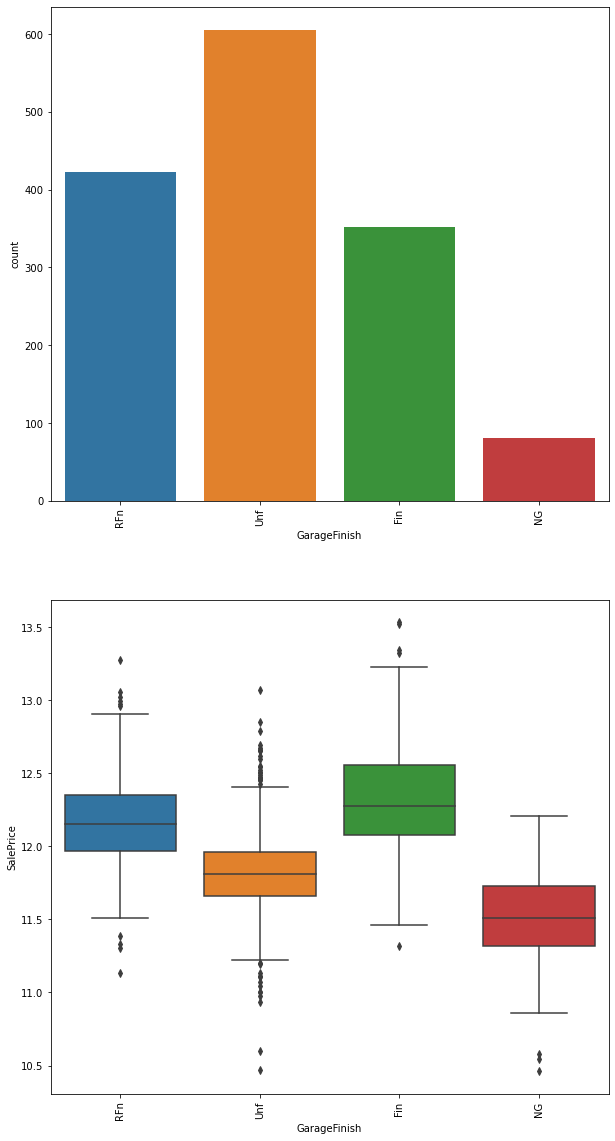

Value Count for GarageQual


TA    1311
NG      81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
-----------------------------------------------------


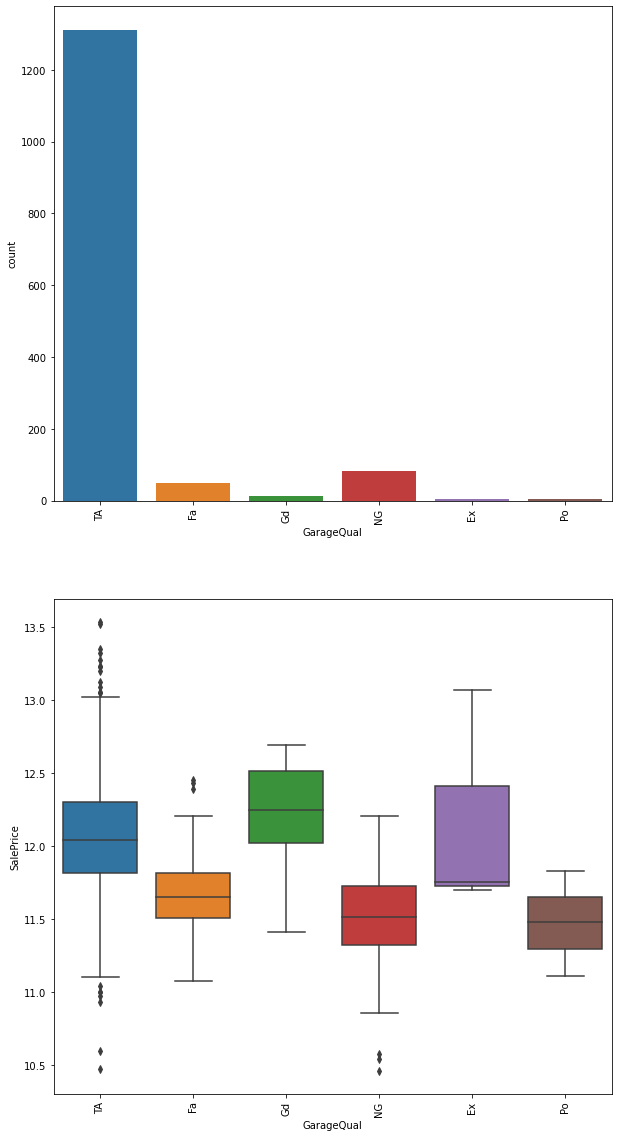

Value Count for GarageCond


TA    1326
NG      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
-----------------------------------------------------


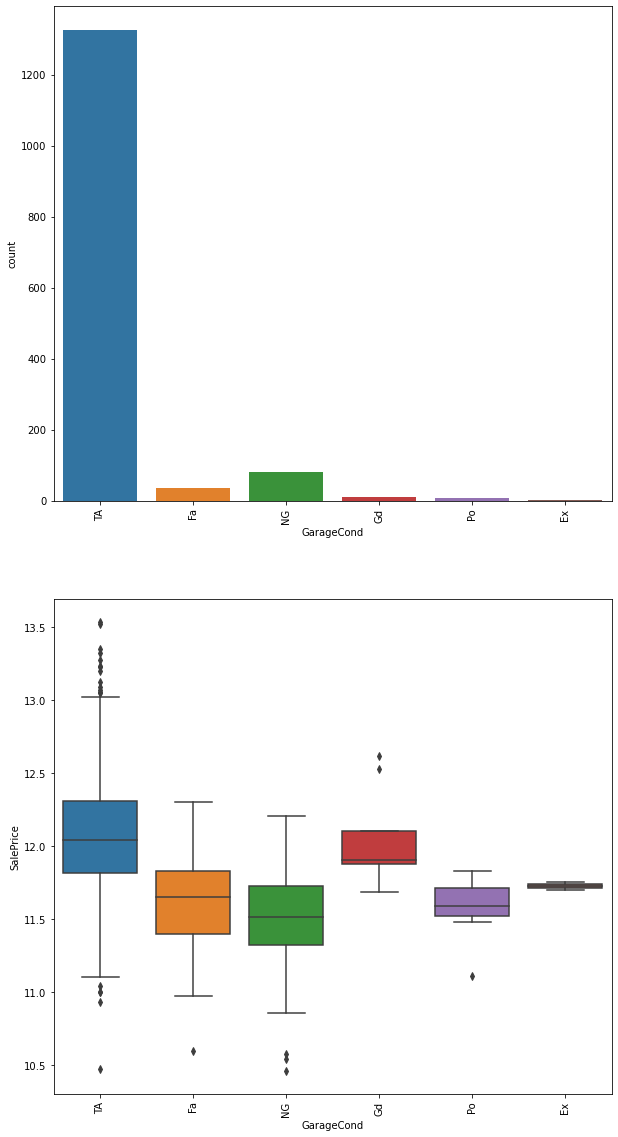

Value Count for PavedDrive


Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64
-----------------------------------------------------


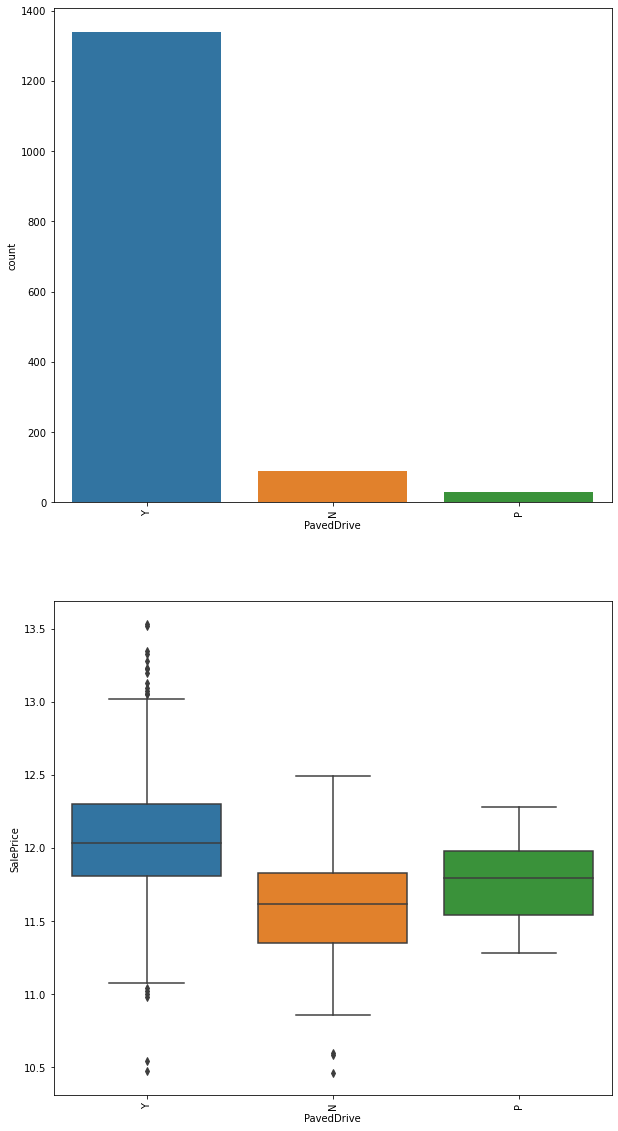

Value Count for SaleType


WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
-----------------------------------------------------


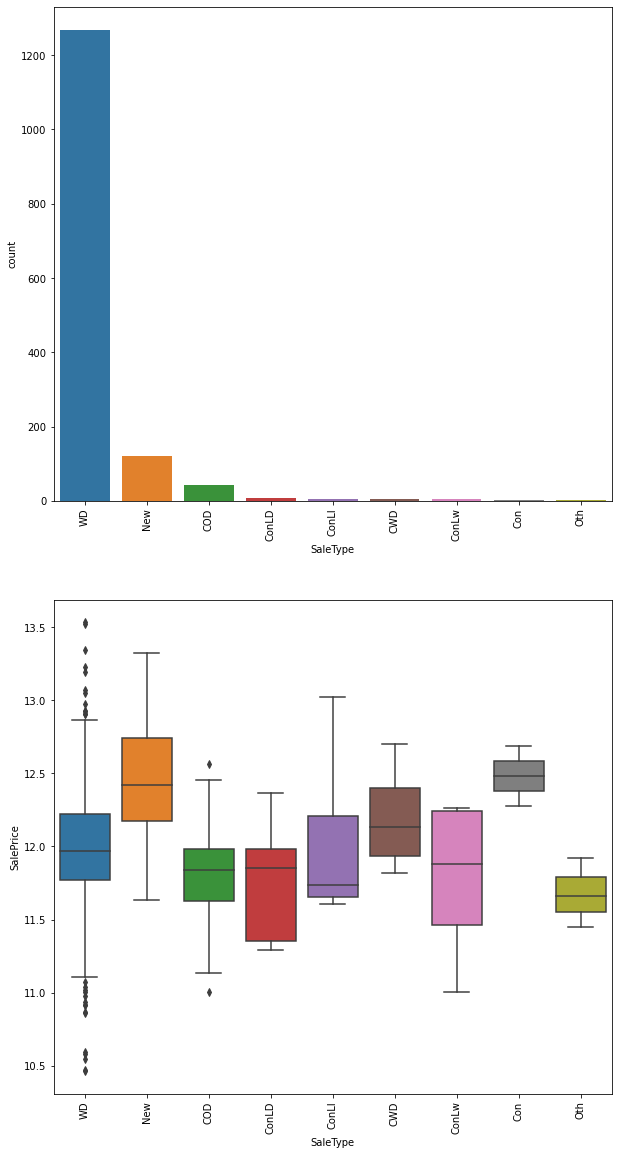

Value Count for SaleCondition


Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
-----------------------------------------------------


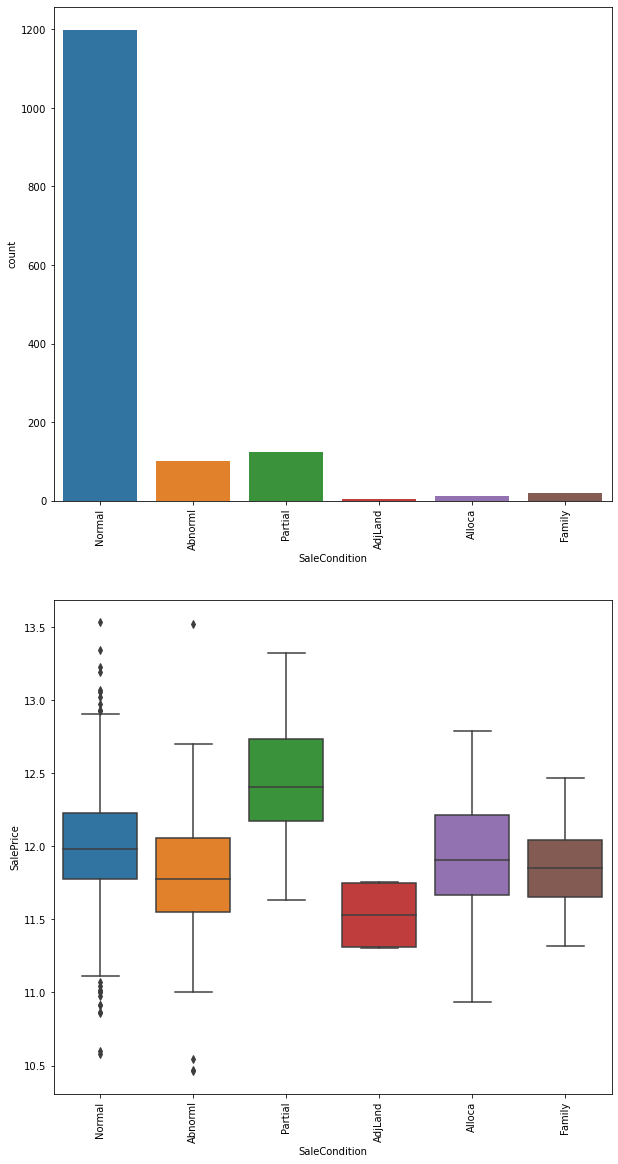

In [60]:
for cols in cat_cols:
    
    analyse_categorical(df,cols)

<div class="alert alert-block alert-info">
Removing all the categorical columns which were highly skewed or had majority same value
</div>

In [61]:
df.drop(['Street','LandContour','Utilities',
        'LandSlope','Condition1','Condition2',
        'RoofMatl','BsmtCond','BsmtFinType2',
        'Heating','CentralAir','Electrical',
        'Functional','GarageQual','GarageCond',
        'PavedDrive','SaleType'],
        axis = 1,inplace = True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   BldgType       1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   object 
 10  OverallCond    1460 non-null   object 
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1460 non-null   object 
 17  MasVnrArea     1460 non-null   float64
 18  ExterQua

In [63]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

In [64]:
len(num_cols)

34

In [65]:
num_cols

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<div class="alert alert-block alert-info">
Converting All year columns to their relative age as of 2022
</div>

In [66]:
df['YearBuilt'].head()

0    2003
1    1976
2    2001
3    1915
4    2000
Name: YearBuilt, dtype: int64

In [67]:
df['HouseAge'] = 2022 - df['YearBuilt']

In [68]:
df['HouseAge'].head()

0     19
1     46
2     21
3    107
4     22
Name: HouseAge, dtype: int64

In [69]:
df['YearRemodAdd'].head()

0    2003
1    1976
2    2002
3    1970
4    2000
Name: YearRemodAdd, dtype: int64

In [70]:
df['RemodAge'] = 2022 -df['YearRemodAdd']

In [71]:
df['RemodAge'].head()

0    19
1    46
2    20
3    52
4    22
Name: RemodAge, dtype: int64

In [72]:
df['GarageYrBlt'].head()

0    2003.0
1    1976.0
2    2001.0
3    1998.0
4    2000.0
Name: GarageYrBlt, dtype: float64

In [73]:
df['GarageAge'] = 2022 - df['GarageYrBlt']

In [74]:
df['GarageAge'].head()

0    19.0
1    46.0
2    21.0
3    24.0
4    22.0
Name: GarageAge, dtype: float64

In [75]:
df['YrSold'].head()

0    2008
1    2007
2    2008
3    2006
4    2008
Name: YrSold, dtype: int64

In [76]:
df['SoldAge'] = 2022 - df['YrSold']

In [77]:
df['SoldAge'].head()

0    14
1    15
2    14
3    16
4    14
Name: SoldAge, dtype: int64

In [78]:
df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

In [79]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

In [80]:
num_cols

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'HouseAge', 'RemodAge', 'GarageAge', 'SoldAge'],
      dtype='object')

In [81]:
num_cols = num_cols.drop('SalePrice')

In [82]:
len(num_cols)

33

<div class="alert alert-block alert-info">
Helper function to analyse numerical columns
</div>

In [83]:
def analyse_numerical(df,colname):
    
    print("Value Count for " + colname)
    print("\n")
    print(df[colname].value_counts())   
    print("-----------------------------------------------------")

    sns.distplot(df[colname])
    # plt.xticks(rotation=90)
    sns.pairplot(df[[colname,'SalePrice']])
    # plt.xticks(rotation=90)
    
    plt.show()

<div class="alert alert-block alert-info">
Analysis for all numerical columns
</div>

Value Count for LotFrontage


69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
-----------------------------------------------------


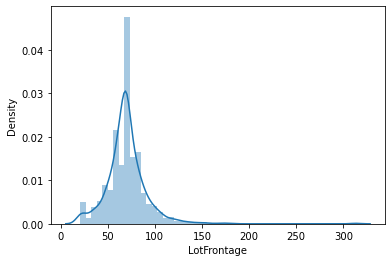

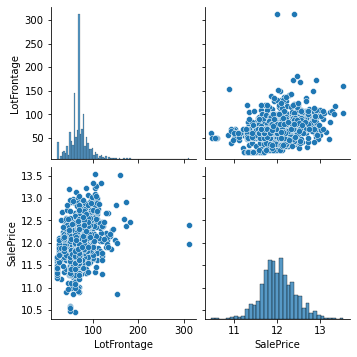

Value Count for LotArea


7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64
-----------------------------------------------------


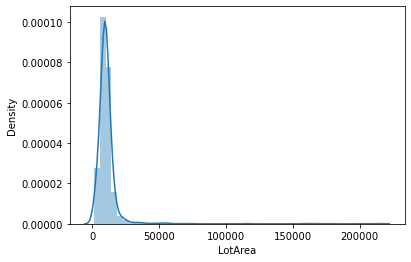

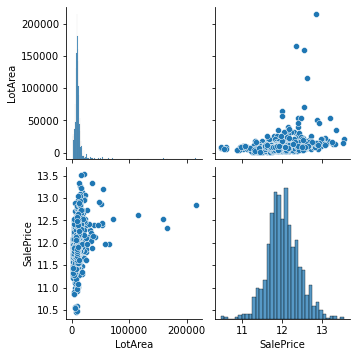

Value Count for MasVnrArea


0.0      869
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64
-----------------------------------------------------


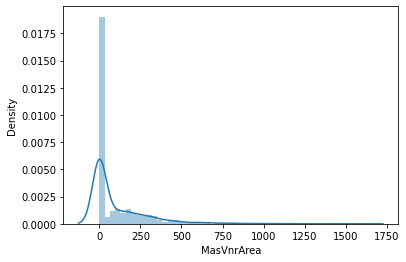

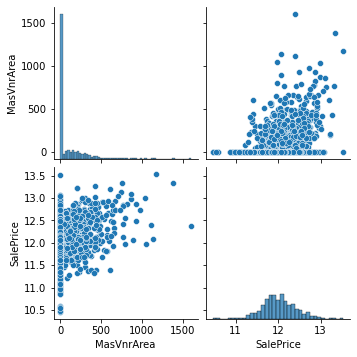

Value Count for BsmtFinSF1


0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: BsmtFinSF1, Length: 637, dtype: int64
-----------------------------------------------------


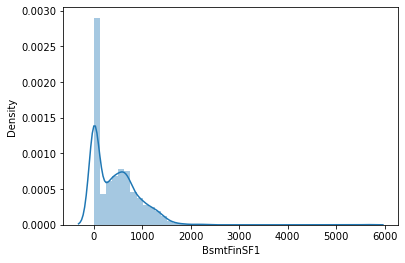

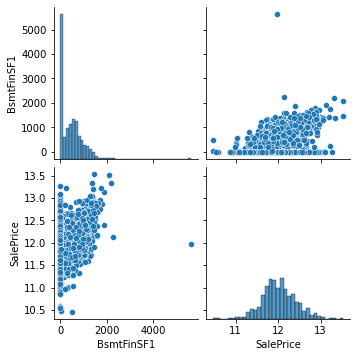

Value Count for BsmtFinSF2


0       1293
180        5
374        3
551        2
147        2
        ... 
532        1
165        1
1120       1
311        1
1029       1
Name: BsmtFinSF2, Length: 144, dtype: int64
-----------------------------------------------------


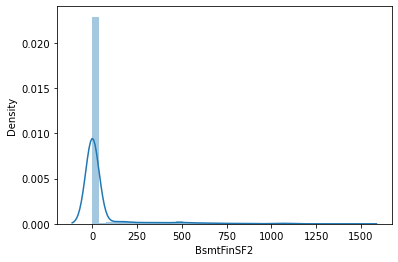

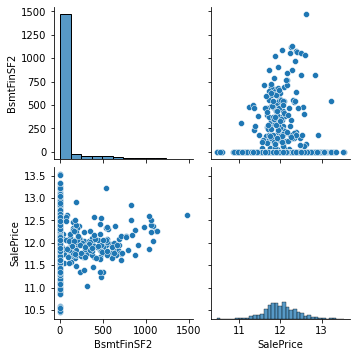

Value Count for BsmtUnfSF


0       118
728       9
384       8
600       7
300       7
       ... 
551       1
1257      1
605       1
467       1
136       1
Name: BsmtUnfSF, Length: 780, dtype: int64
-----------------------------------------------------


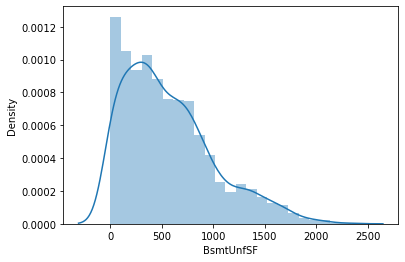

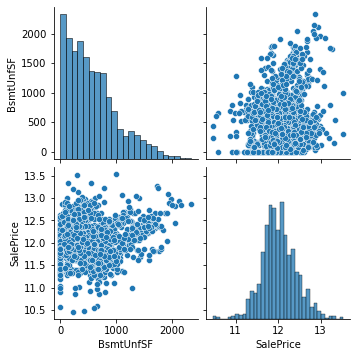

Value Count for TotalBsmtSF


0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: TotalBsmtSF, Length: 721, dtype: int64
-----------------------------------------------------


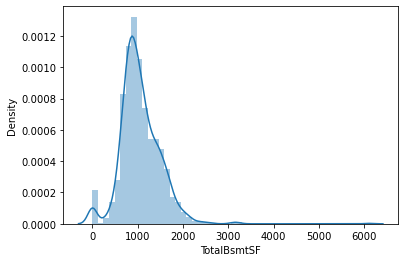

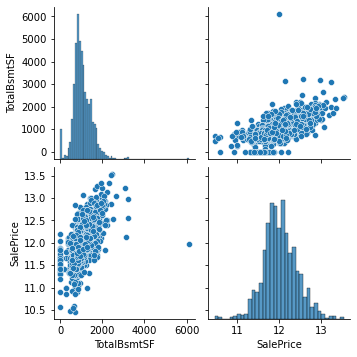

Value Count for 1stFlrSF


864     25
1040    16
912     14
894     12
848     12
        ..
1509     1
2515     1
605      1
3138     1
1256     1
Name: 1stFlrSF, Length: 753, dtype: int64
-----------------------------------------------------


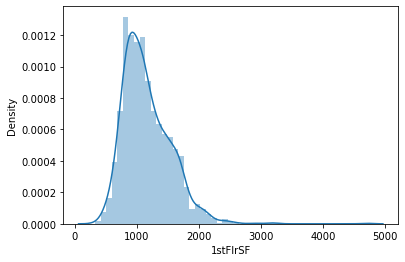

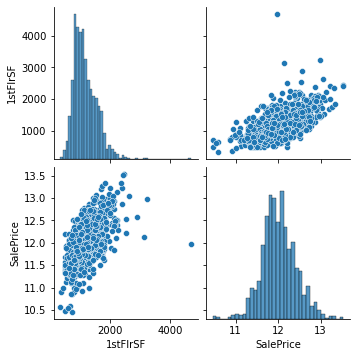

Value Count for 2ndFlrSF


0       829
728      10
504       9
546       8
672       8
       ... 
1538      1
914       1
1067      1
1000      1
1152      1
Name: 2ndFlrSF, Length: 417, dtype: int64
-----------------------------------------------------


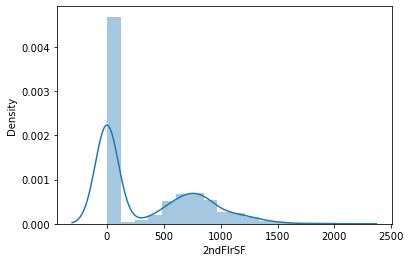

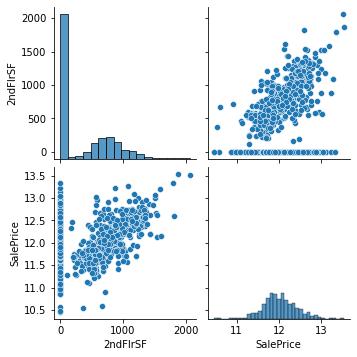

Value Count for LowQualFinSF


0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64
-----------------------------------------------------


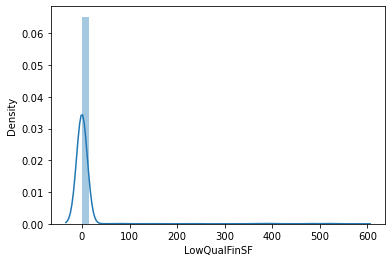

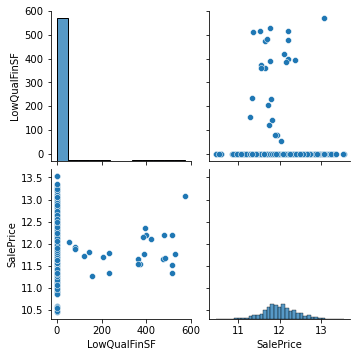

Value Count for GrLivArea


864     22
1040    14
894     11
1456    10
848     10
        ..
2296     1
1123     1
1199     1
1473     1
1256     1
Name: GrLivArea, Length: 861, dtype: int64
-----------------------------------------------------


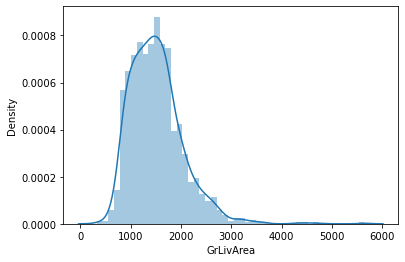

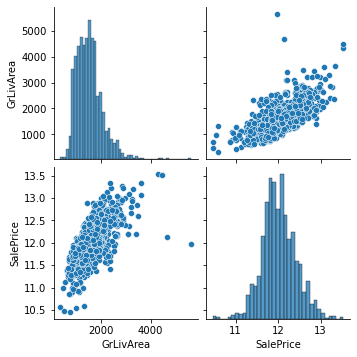

Value Count for BsmtFullBath


0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64
-----------------------------------------------------


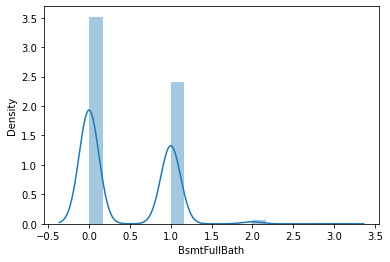

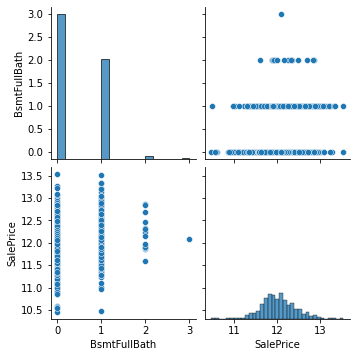

Value Count for BsmtHalfBath


0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64
-----------------------------------------------------


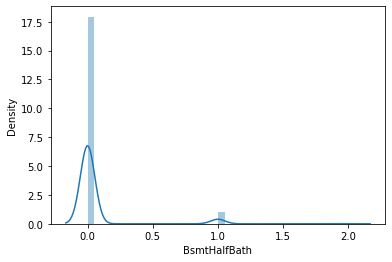

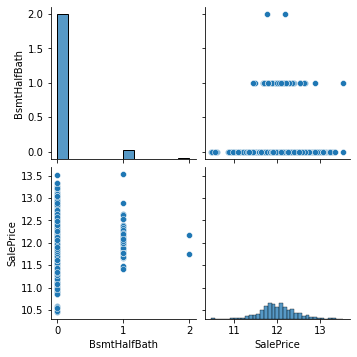

Value Count for FullBath


2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64
-----------------------------------------------------


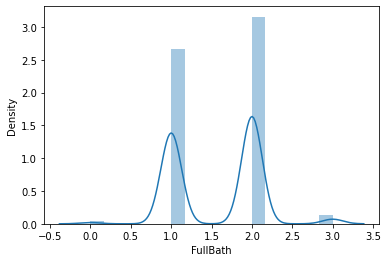

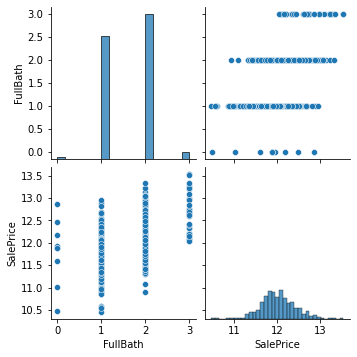

Value Count for HalfBath


0    913
1    535
2     12
Name: HalfBath, dtype: int64
-----------------------------------------------------


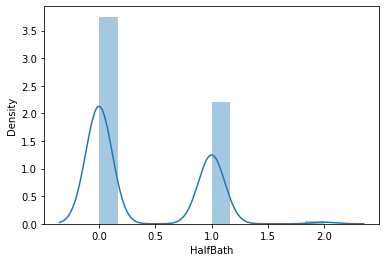

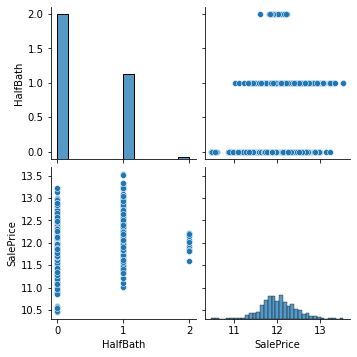

Value Count for BedroomAbvGr


3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64
-----------------------------------------------------


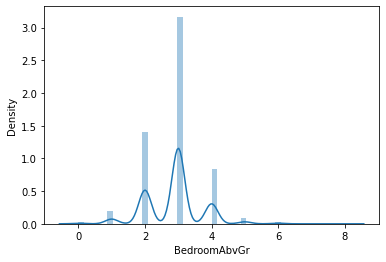

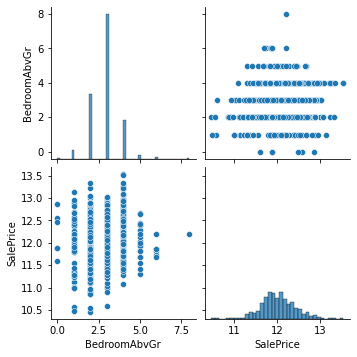

Value Count for KitchenAbvGr


1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64
-----------------------------------------------------


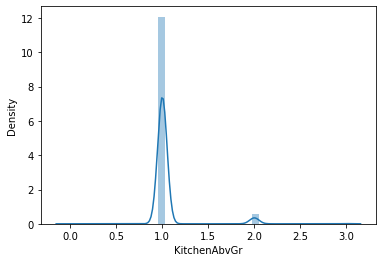

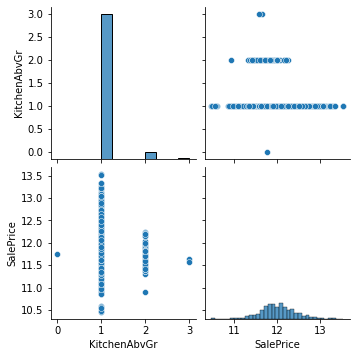

Value Count for TotRmsAbvGrd


6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64
-----------------------------------------------------


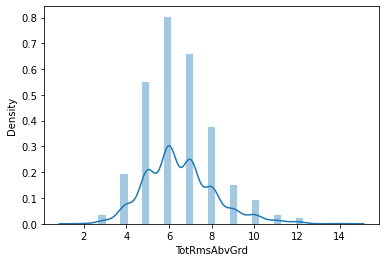

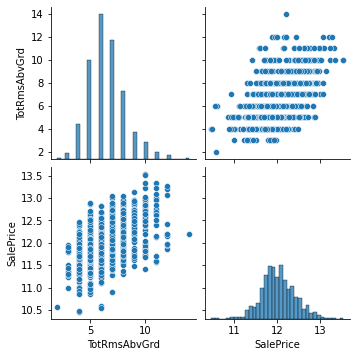

Value Count for Fireplaces


0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64
-----------------------------------------------------


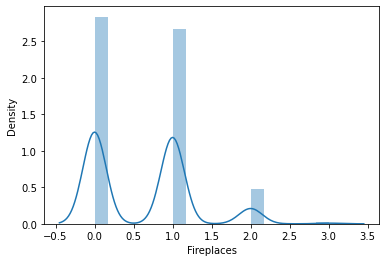

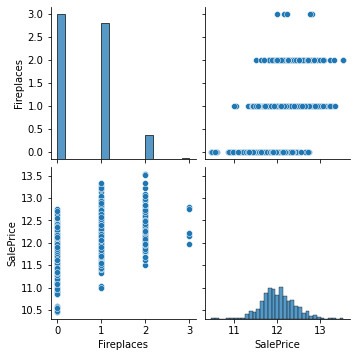

Value Count for GarageCars


2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64
-----------------------------------------------------


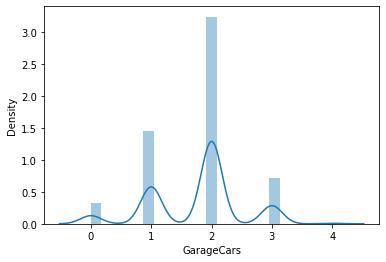

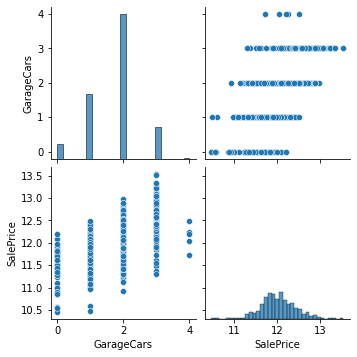

Value Count for GarageArea


0      81
440    49
576    47
240    38
484    34
       ..
320     1
594     1
831     1
878     1
192     1
Name: GarageArea, Length: 441, dtype: int64
-----------------------------------------------------


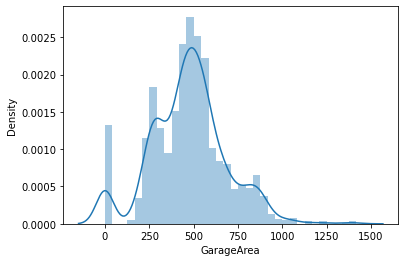

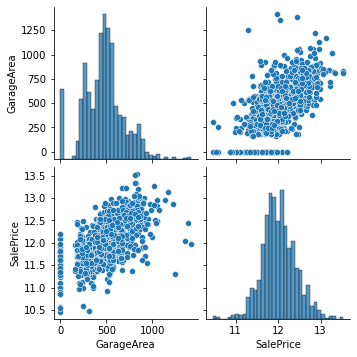

Value Count for WoodDeckSF


0      761
192     38
100     36
144     33
120     31
      ... 
326      1
179      1
103      1
176      1
736      1
Name: WoodDeckSF, Length: 274, dtype: int64
-----------------------------------------------------


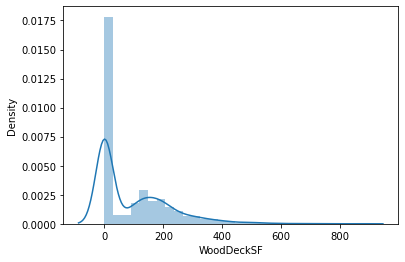

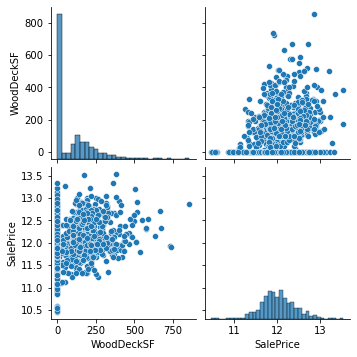

Value Count for OpenPorchSF


0      656
36      29
48      22
20      21
40      19
      ... 
11       1
523      1
125      1
137      1
236      1
Name: OpenPorchSF, Length: 202, dtype: int64
-----------------------------------------------------


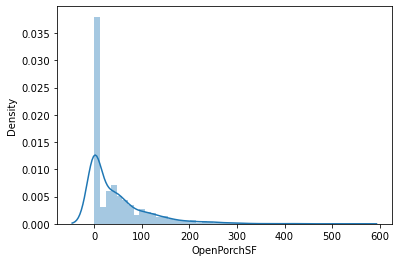

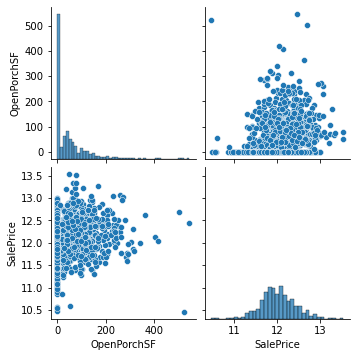

Value Count for EnclosedPorch


0      1252
112      15
96        6
192       5
144       5
       ... 
54        1
136       1
148       1
140       1
99        1
Name: EnclosedPorch, Length: 120, dtype: int64
-----------------------------------------------------


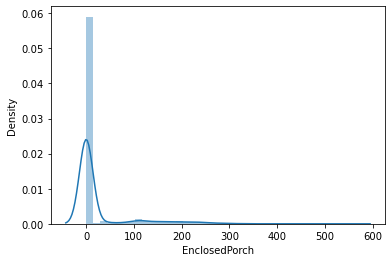

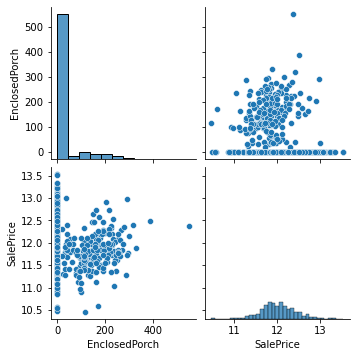

Value Count for 3SsnPorch


0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64
-----------------------------------------------------


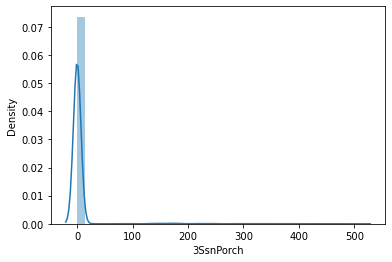

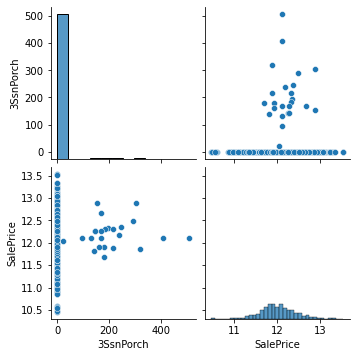

Value Count for ScreenPorch


0      1344
192       6
120       5
224       5
189       4
       ... 
291       1
260       1
385       1
156       1
40        1
Name: ScreenPorch, Length: 76, dtype: int64
-----------------------------------------------------


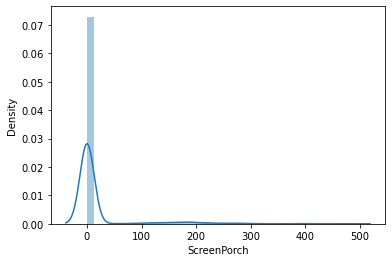

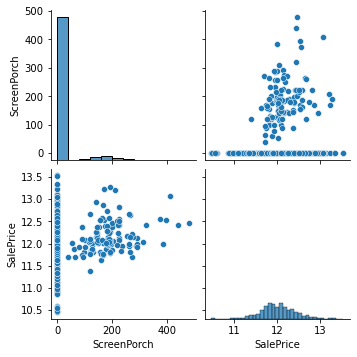

Value Count for PoolArea


0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64
-----------------------------------------------------


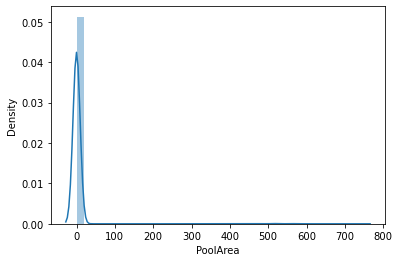

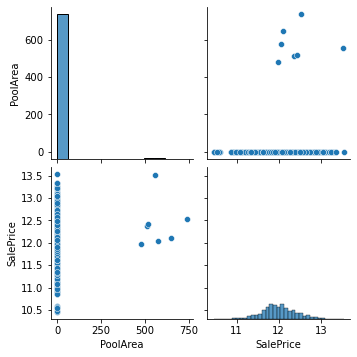

Value Count for MiscVal


0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64
-----------------------------------------------------


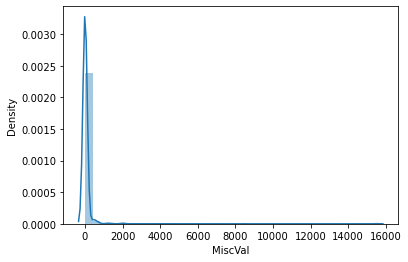

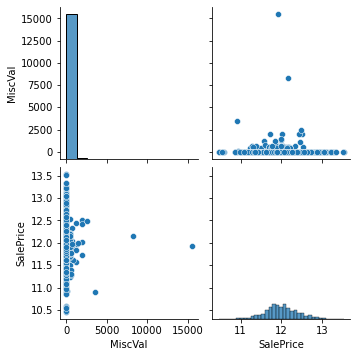

Value Count for MoSold


6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64
-----------------------------------------------------


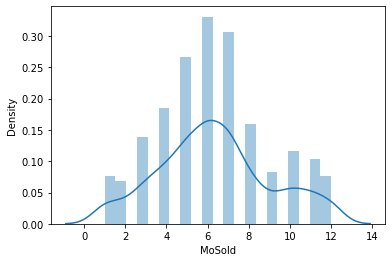

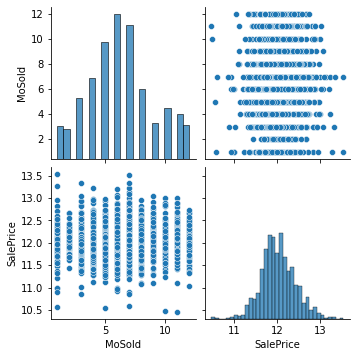

Value Count for HouseAge


16     67
17     64
18     54
15     49
19     45
       ..
147     1
111     1
105     1
150     1
117     1
Name: HouseAge, Length: 112, dtype: int64
-----------------------------------------------------


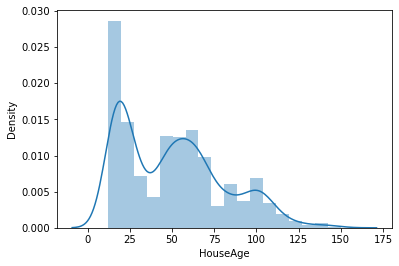

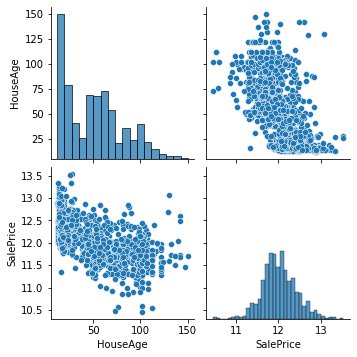

Value Count for RemodAge


72    178
16     97
15     76
17     73
18     62
     ... 
12      6
36      5
70      5
39      5
71      4
Name: RemodAge, Length: 61, dtype: int64
-----------------------------------------------------


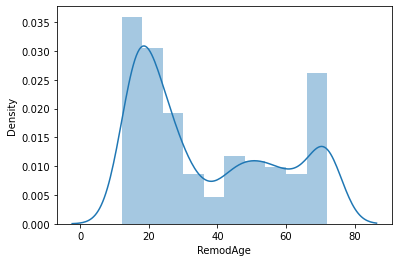

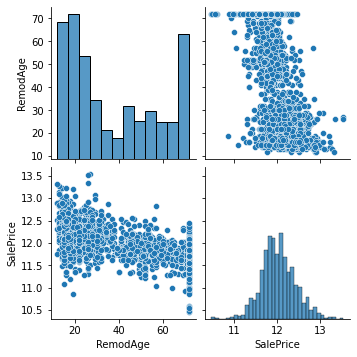

Value Count for GarageAge


44.0     100
17.0      65
16.0      59
18.0      53
19.0      50
        ... 
122.0      1
116.0      1
114.0      1
95.0       1
89.0       1
Name: GarageAge, Length: 97, dtype: int64
-----------------------------------------------------


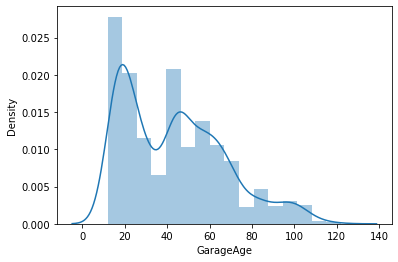

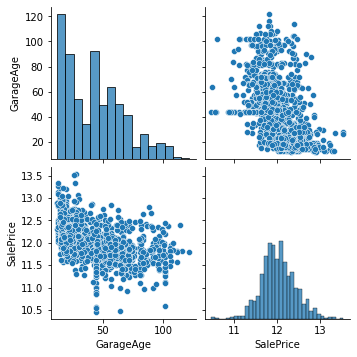

Value Count for SoldAge


13    338
15    329
16    314
14    304
12    175
Name: SoldAge, dtype: int64
-----------------------------------------------------


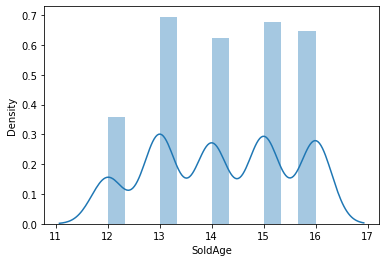

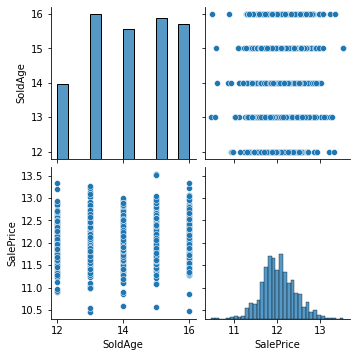

In [84]:
for cols in num_cols:
    
    analyse_numerical(df,cols)

In [85]:
cat_cols = df.select_dtypes(include=['object']).columns

In [86]:
df_cat = df[cat_cols]

In [87]:
df_cat.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,...,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,SaleCondition
0,2-STORY 1946 & NEWE,RL,Reg,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,...,PConc,Gd,No,GLQ,Ex,Gd,NF,Attchd,RFn,Normal
1,1-STORY 1946 & NEWER ALL STYLE,RL,Reg,FR2,Veenker,1Fam,1Story,Above Average,Very Good,Gable,...,CBlock,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn,Normal
2,2-STORY 1946 & NEWE,RL,IR1,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,...,PConc,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn,Normal
3,2-STORY 1945 & OLDE,RL,IR1,Corner,Crawfor,1Fam,2Story,Good,Average,Gable,...,BrkTil,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf,Abnorml
4,2-STORY 1946 & NEWE,RL,IR1,FR2,NoRidge,1Fam,2Story,Very Good,Average,Gable,...,PConc,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn,Normal


<div class="alert alert-block alert-info">
Creating Dummies for categorical columns
</div>

In [88]:
df_cat = pd.get_dummies(df_cat,drop_first=True)  # Dummy variables
print(df_cat.shape)


(1460, 166)


In [89]:
df = pd.concat([df,df_cat],axis = 1)

In [90]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageType_Detchd,GarageType_NG,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2-STORY 1946 & NEWE,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,...,0,0,0,1,0,0,0,0,1,0
1,1-STORY 1946 & NEWER ALL STYLE,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Above Average,...,0,0,0,1,0,0,0,0,1,0
2,2-STORY 1946 & NEWE,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,Good,...,0,0,0,1,0,0,0,0,1,0
3,2-STORY 1945 & OLDE,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,Good,...,1,0,0,0,1,0,0,0,0,0
4,2-STORY 1946 & NEWE,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,Very Good,...,0,0,0,1,0,0,0,0,1,0


In [91]:
df.shape

(1460, 225)

In [92]:
df.drop(cat_cols,axis=1,inplace=True)

In [93]:
df.shape

(1460, 200)

## Step 4: Model Building and Evaluation

<div class="alert alert-block alert-info">
Dividing predictor variables and target variables in X and y
</div>

In [94]:
X = df.drop(['SalePrice'],axis = 1)
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_Detchd,GarageType_NG,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,1,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,1,0,0,0,0,1,0


In [95]:
y = df['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

<div class="alert alert-block alert-info">
Train test split 
</div>

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)

In [97]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_Detchd,GarageType_NG,GarageFinish_NG,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
133,69.0,6853,136.0,1005,0,262,1267,1296,0,0,...,0,0,0,0,0,0,0,0,1,0
290,120.0,15611,0.0,0,0,1079,1079,1079,840,0,...,0,0,0,1,0,0,0,0,0,1
24,69.0,8246,0.0,188,668,204,1060,1060,0,0,...,0,0,0,0,1,0,0,0,1,0
1093,71.0,9230,166.0,661,0,203,864,1200,0,0,...,1,0,0,0,1,0,0,0,1,0
1288,40.0,5664,0.0,1158,0,343,1501,1659,0,0,...,0,0,0,0,0,0,0,0,1,0


In [98]:
num_cols = X_train.select_dtypes(include=['int64','float64']).columns

<div class="alert alert-block alert-info">
Standard Scaling numerical variables
</div>

In [99]:
scaler = StandardScaler()
X_train[num_cols] =scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [100]:
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1168, 199)
X_test Shape: (292, 199)
y_train Shape: (1168,)
y_test Shape: (292,)


In [101]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV

<div class="alert alert-block alert-info">
Finding Optimal Value of Alpha for Ridge Regression using GridSearchCV
</div>

In [102]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,n_jobs = -1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [103]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.039999,0.004471,0.006000,0.001097,0.0001,{'alpha': 0.0001},-0.102664,-0.094537,-0.097536,-0.094089,...,-0.097636,0.003176,25,-0.075860,-0.076129,-0.069343,-0.075879,-0.076728,-0.074788,0.002740
1,0.038601,0.005425,0.005600,0.000800,0.001,{'alpha': 0.001},-0.102651,-0.094533,-0.097518,-0.094065,...,-0.097621,0.003177,24,-0.075861,-0.076127,-0.069343,-0.075879,-0.076729,-0.074788,0.002740
2,0.041400,0.008310,0.006002,0.001095,0.01,{'alpha': 0.01},-0.102534,-0.094493,-0.097364,-0.093833,...,-0.097482,0.003184,23,-0.075874,-0.076109,-0.069348,-0.075879,-0.076739,-0.074790,0.002739
3,0.019400,0.009891,0.005199,0.000749,0.05,{'alpha': 0.05},-0.102123,-0.094320,-0.097042,-0.092969,...,-0.097017,0.003235,22,-0.075912,-0.076032,-0.069382,-0.075868,-0.076790,-0.074797,0.002728
4,0.015400,0.001357,0.005199,0.000401,0.1,{'alpha': 0.1},-0.101738,-0.094148,-0.096896,-0.092142,...,-0.096623,0.003314,21,-0.075945,-0.075950,-0.069425,-0.075867,-0.076849,-0.074807,0.002715


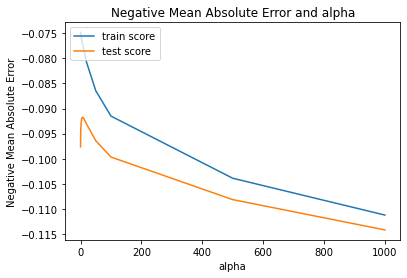

In [104]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

<div class="alert alert-block alert-info">
Alpha for Ridge Regression : 10
</div>

In [105]:
#optimum alpha

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.12728208e-02,  1.59004847e-02,  3.66411759e-03,  4.36421987e-03,
        5.28814985e-03,  6.39489591e-03,  1.27632851e-02,  2.82198041e-02,
        4.72449985e-02, -1.58915766e-03,  6.03396752e-02,  2.51089484e-02,
        4.00667995e-03,  2.84785747e-02,  1.82041842e-02,  3.84783900e-03,
       -2.07809071e-02,  1.74309605e-02,  1.05387445e-02,  3.89929586e-02,
        5.05264672e-03,  1.14120453e-02, -1.24820862e-04,  1.03493377e-02,
        6.75725442e-03,  1.10220545e-02, -1.20644996e-02, -9.65240554e-04,
        8.57636867e-05, -5.23430194e-02, -2.69264440e-02,  1.93995285e-03,
        8.94908522e-03,  1.73735388e-02, -6.28239582e-02,  3.56148057e-02,
       -2.50914040e-03,  3.85018114e-03,  2.57493464e-03,  2.93149679e-02,
        4.31105447e-02, -2.19662209e-02, -7.02982304e-02,  1.66970962e-02,
       -2.64750170e-02,  2.43776019e-02,  1.25547471e-02,  8.80819591e-02,
        4.13484292e-02,  5.85598165e-02,  1.05007093e-02,  1.66397329e-02,
       -5.02683637e-02,  

<div class="alert alert-block alert-info">
R2 scores
</div>

In [106]:
ridge.score(X_train,y_train)

0.9102508912809643

In [107]:
ridge.score(X_test,y_test)

0.8793450571986363

<div class="alert alert-block alert-info">
Predictors and their coefficients
</div>

In [108]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.022),
 ('LotFrontage', -0.145),
 ('LotArea', -0.084),
 ('MasVnrArea', -0.084),
 ('BsmtFinSF1', -0.078),
 ('BsmtFinSF2', -0.073),
 ('BsmtUnfSF', -0.07),
 ('TotalBsmtSF', -0.07),
 ('1stFlrSF', -0.063),
 ('2ndFlrSF', -0.06),
 ('LowQualFinSF', -0.059),
 ('GrLivArea', -0.056),
 ('BsmtFullBath', -0.056),
 ('BsmtHalfBath', -0.052),
 ('FullBath', -0.052),
 ('HalfBath', -0.05),
 ('BedroomAbvGr', -0.049),
 ('KitchenAbvGr', -0.048),
 ('TotRmsAbvGrd', -0.047),
 ('Fireplaces', -0.045),
 ('GarageCars', -0.043),
 ('GarageArea', -0.043),
 ('WoodDeckSF', -0.042),
 ('OpenPorchSF', -0.04),
 ('EnclosedPorch', -0.039),
 ('3SsnPorch', -0.039),
 ('ScreenPorch', -0.037),
 ('PoolArea', -0.037),
 ('MiscVal', -0.037),
 ('MoSold', -0.036),
 ('HouseAge', -0.034),
 ('RemodAge', -0.033),
 ('GarageAge', -0.031),
 ('SoldAge', -0.029),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGE', -0.029),
 ('MSSubClass_1-STORY 1945 & OLDE', -0.028),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLE', -0.027),
 ('MSSubClass_

<div class="alert alert-block alert-info">
Finding Optimal Value of Alpha for Lasso Regression using GridSearchCV
</div>

In [109]:
# list of alphas to tune
params = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}

# params = {'alpha': np.logspace(-2, 0.00001, 100)}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,n_jobs = -1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [6e-05, 0.0006, 0.0008, 0.001, 0.002, 0.004,
                                   0.006, 0.008]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [110]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.191002,0.067613,0.005000,0.000895,0.00006,{'alpha': 6e-05},-0.100164,-0.093250,-0.095164,-0.088377,...,-0.094728,0.003901,4,-0.075728,-0.076018,-0.069824,-0.075825,-0.077384,-0.074956,0.002635
1,0.093402,0.011602,0.004800,0.000398,0.0006,{'alpha': 0.0006},-0.093241,-0.093110,-0.092738,-0.083392,...,-0.090678,0.003738,1,-0.079094,-0.079642,-0.074376,-0.078443,-0.080369,-0.078385,0.002102
2,0.072197,0.014021,0.004602,0.000489,0.0008,{'alpha': 0.0008},-0.094223,-0.093090,-0.092900,-0.084588,...,-0.091380,0.003463,2,-0.080643,-0.080833,-0.075828,-0.079939,-0.081624,-0.079773,0.002044
3,0.059601,0.014555,0.005402,0.000490,0.001,{'alpha': 0.001},-0.096653,-0.093738,-0.093497,-0.085749,...,-0.092606,0.003636,3,-0.082407,-0.082145,-0.077641,-0.081358,-0.083122,-0.081334,0.001931
4,0.030399,0.006500,0.005243,0.000386,0.002,{'alpha': 0.002},-0.101311,-0.095684,-0.098824,-0.090359,...,-0.097290,0.003950,5,-0.087893,-0.088562,-0.084960,-0.088457,-0.091518,-0.088278,0.002087


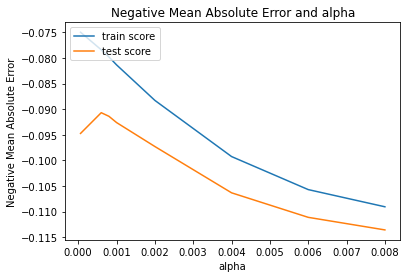

In [111]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

<div class="alert alert-block alert-info">
Alpha for Lasso Regression : 0.001
</div>

In [112]:
#optimum alpha

alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.00814409,  0.01375695,  0.00483095,  0.        ,  0.00043729,
        0.        ,  0.03263882,  0.        ,  0.01137092, -0.0053714 ,
        0.10387552,  0.02632598,  0.00413251,  0.02318303,  0.01421058,
        0.00204214, -0.0245938 ,  0.01885252,  0.01587264,  0.04394413,
        0.00272757,  0.01146279,  0.        ,  0.00980993,  0.00591421,
        0.01169738, -0.01469265, -0.        ,  0.        , -0.05298096,
       -0.03263081,  0.        ,  0.00789707,  0.        , -0.07265326,
        0.03089228, -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.01679518, -0.08320877,  0.        , -0.        ,
        0.        ,  0.        ,  0.08819671,  0.        ,  0.0502118 ,
       -0.        ,  0.        , -0.        , -0.        ,  0.02872732,
       -0.        , -0.        , -0.00023211, -0.        , -0.        ,
        0.02813442,  0.02199106,  0.        ,  0.12652881, -0.06708437,
       -0.        , -0.05816208, -0.06224494, -0.        , -0.  

<div class="alert alert-block alert-info">
R2 scores
</div>

In [113]:
lasso.score(X_train,y_train)

0.898790357057547

In [114]:
lasso.score(X_test,y_test)

0.8720838284535442

<div class="alert alert-block alert-info">
Predictors with their coefficients
</div>

In [115]:
# Ridge model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
coeff = list(zip(cols, model_parameters))
coeff

[('constant', 11.958),
 ('LotFrontage', -0.207),
 ('LotArea', -0.083),
 ('MasVnrArea', -0.075),
 ('BsmtFinSF1', -0.073),
 ('BsmtFinSF2', -0.067),
 ('BsmtUnfSF', -0.062),
 ('TotalBsmtSF', -0.058),
 ('1stFlrSF', -0.053),
 ('2ndFlrSF', -0.046),
 ('LowQualFinSF', -0.041),
 ('GrLivArea', -0.033),
 ('BsmtFullBath', -0.032),
 ('BsmtHalfBath', -0.032),
 ('FullBath', -0.029),
 ('HalfBath', -0.025),
 ('BedroomAbvGr', -0.024),
 ('KitchenAbvGr', -0.021),
 ('TotRmsAbvGrd', -0.02),
 ('Fireplaces', -0.02),
 ('GarageCars', -0.019),
 ('GarageArea', -0.017),
 ('WoodDeckSF', -0.017),
 ('OpenPorchSF', -0.017),
 ('EnclosedPorch', -0.015),
 ('3SsnPorch', -0.015),
 ('ScreenPorch', -0.012),
 ('PoolArea', -0.012),
 ('MiscVal', -0.011),
 ('MoSold', -0.009),
 ('HouseAge', -0.009),
 ('RemodAge', -0.008),
 ('GarageAge', -0.008),
 ('SoldAge', -0.005),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGE', -0.005),
 ('MSSubClass_1-STORY 1945 & OLDE', -0.004),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLE', -0.003),
 ('MSSubCla

In [116]:
coeff = [x for x in coeff if abs(x[-1] != 0)]
len(coeff)

87

In [117]:
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)

<div class="alert alert-block alert-info">
Checking for Assumptions
</div>

Error distribution in train dataset


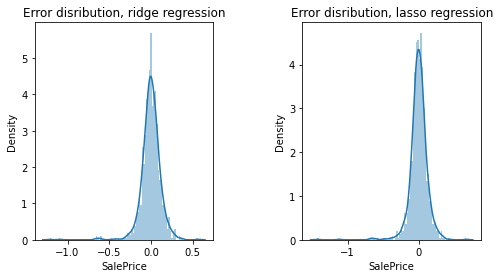

In [118]:
print('Error distribution in train dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_pred_ridge_train), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_train - y_pred_lasso_train), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [119]:
print('r2_score in train dataset')
print('r2_score for ridge:', r2_score(y_train, y_pred_ridge_train))
print('r2_score for lasso:', r2_score(y_train, y_pred_lasso_train))

r2_score in train dataset
r2_score for ridge: 0.9102508912809643
r2_score for lasso: 0.898790357057547


In [120]:
y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test)

Error distribution in test dataset


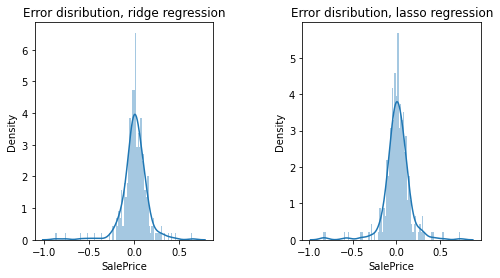

In [121]:
print('Error distribution in test dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_pred_ridge_test), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_pred_lasso_test), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [122]:
print('r2_score in train dataset:')
print('r2_score for ridge:', round(r2_score(y_train, y_pred_ridge_train), 2))
print('r2_score for lasso:', round(r2_score(y_train, y_pred_lasso_train), 2))

print('r2_score in test dataset:')
print('r2_score for ridge:', round(r2_score(y_test, y_pred_ridge_test), 2))
print('r2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score in train dataset:
r2_score for ridge: 0.91
r2_score for lasso: 0.9
r2_score in test dataset:
r2_score for ridge: 0.88
r2_score for lasso: 0.87


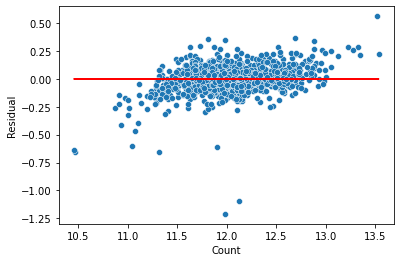

In [123]:
# y_train_pred = lm_3.predict(X_train_rfe)
residual = y_train - y_pred_ridge_train
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

<div class="alert alert-block alert-info">
Additional:
</div>

In [124]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-9.99789592e-03,  1.53252568e-02,  5.89628766e-03,  7.39855653e-03,
        5.66840956e-03,  7.27877883e-03,  1.68951449e-02,  2.78476226e-02,
        4.58663638e-02, -2.28571630e-03,  5.88501329e-02,  2.46318655e-02,
        4.02845914e-03,  2.84243167e-02,  1.78927985e-02,  3.22253084e-03,
       -2.20276921e-02,  2.00148838e-02,  1.49865778e-02,  3.87070530e-02,
        8.86608717e-03,  1.17336355e-02,  5.69139333e-05,  9.91430530e-03,
        6.71026213e-03,  1.11091804e-02, -1.37869746e-02, -1.14598434e-03,
        4.35403069e-04, -5.07234317e-02, -3.12035164e-02,  2.20514058e-03,
        8.53084740e-03,  1.24340727e-02, -5.64426242e-02,  3.48211184e-02,
        7.10238176e-04,  4.93411692e-03,  7.22390901e-04,  1.96137843e-02,
        4.06576131e-02, -1.97779312e-02, -5.72464671e-02,  1.27329842e-02,
       -1.84752352e-02,  1.51640379e-02,  7.98847725e-03,  6.05933203e-02,
        2.16268027e-02,  4.39406986e-02, -1.08897819e-02,  1.28088788e-02,
       -3.97187269e-02, -

In [125]:
ridge.score(X_train,y_train)

0.9034005339795931

In [126]:
ridge.score(X_test,y_test)

0.8736596557182401

In [127]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.033),
 ('LotFrontage', -0.11),
 ('LotArea', -0.077),
 ('MasVnrArea', -0.062),
 ('BsmtFinSF1', -0.058),
 ('BsmtFinSF2', -0.057),
 ('BsmtUnfSF', -0.056),
 ('TotalBsmtSF', -0.051),
 ('1stFlrSF', -0.051),
 ('2ndFlrSF', -0.047),
 ('LowQualFinSF', -0.047),
 ('GrLivArea', -0.045),
 ('BsmtFullBath', -0.045),
 ('BsmtHalfBath', -0.045),
 ('FullBath', -0.044),
 ('HalfBath', -0.043),
 ('BedroomAbvGr', -0.041),
 ('KitchenAbvGr', -0.04),
 ('TotRmsAbvGrd', -0.037),
 ('Fireplaces', -0.035),
 ('GarageCars', -0.034),
 ('GarageArea', -0.033),
 ('WoodDeckSF', -0.032),
 ('OpenPorchSF', -0.032),
 ('EnclosedPorch', -0.032),
 ('3SsnPorch', -0.032),
 ('ScreenPorch', -0.032),
 ('PoolArea', -0.031),
 ('MiscVal', -0.029),
 ('MoSold', -0.028),
 ('HouseAge', -0.028),
 ('RemodAge', -0.028),
 ('GarageAge', -0.027),
 ('SoldAge', -0.026),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGE', -0.026),
 ('MSSubClass_1-STORY 1945 & OLDE', -0.022),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLE', -0.022),
 ('MSSubCla

In [128]:
#optimum alpha

alpha = 0.001*2
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-2.73867138e-03,  1.25205905e-02,  6.44530044e-03,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  4.00429190e-02,  0.00000000e+00,
        4.66987569e-03, -6.24905217e-03,  1.09977696e-01,  2.62407104e-02,
        3.94719671e-03,  2.19901955e-02,  1.15021761e-02,  0.00000000e+00,
       -2.80783431e-02,  1.76674601e-02,  2.49347916e-02,  4.76653584e-02,
        5.55329982e-03,  1.09933392e-02,  0.00000000e+00,  7.10896123e-03,
        5.12563102e-03,  1.13487625e-02, -1.79413165e-02,  0.00000000e+00,
        0.00000000e+00, -4.68053937e-02, -4.00292553e-02,  0.00000000e+00,
        6.05025119e-03,  0.00000000e+00, -6.03374542e-02,  2.18779893e-02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -4.54260818e-02, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.58577762e-02,
        0.00000000e+00,  1.79301826e-02, -3.58424155e-02,  0.00000000e+00,
       -0.00000000e+00, -

In [129]:
lasso.score(X_train,y_train)

0.8807979142080157

In [130]:
lasso.score(X_test,y_test)

0.8570813240157673

In [131]:
# Ridge model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
coeff = list(zip(cols, model_parameters))

In [132]:
coeff

[('constant', 11.982),
 ('LotFrontage', -0.148),
 ('LotArea', -0.064),
 ('MasVnrArea', -0.06),
 ('BsmtFinSF1', -0.052),
 ('BsmtFinSF2', -0.047),
 ('BsmtUnfSF', -0.045),
 ('TotalBsmtSF', -0.04),
 ('1stFlrSF', -0.036),
 ('2ndFlrSF', -0.031),
 ('LowQualFinSF', -0.031),
 ('GrLivArea', -0.029),
 ('BsmtFullBath', -0.028),
 ('BsmtHalfBath', -0.022),
 ('FullBath', -0.019),
 ('HalfBath', -0.018),
 ('BedroomAbvGr', -0.013),
 ('KitchenAbvGr', -0.01),
 ('TotRmsAbvGrd', -0.008),
 ('Fireplaces', -0.006),
 ('GarageCars', -0.005),
 ('GarageArea', -0.005),
 ('WoodDeckSF', -0.004),
 ('OpenPorchSF', -0.004),
 ('EnclosedPorch', -0.003),
 ('3SsnPorch', -0.003),
 ('ScreenPorch', -0.001),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', -0.0),
 ('HouseAge', 0.0),
 ('RemodAge', 0.0),
 ('GarageAge', 0.0),
 ('SoldAge', 0.0),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGE', 0.0),
 ('MSSubClass_1-STORY 1945 & OLDE', 0.0),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLE', 0.0),
 ('MSSubClass_1-STORY PUD (Planned Unit D

In [133]:
coeff = [x for x in coeff if abs(x[-1] != 0)]
len(coeff)

65

In [134]:
# list of alphas to tune
params = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}

# params = {'alpha': np.logspace(-2, 0.00001, 100)}

X_train.drop(['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2'],axis=1,inplace=True)

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,n_jobs = -1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [6e-05, 0.0006, 0.0008, 0.001, 0.002, 0.004,
                                   0.006, 0.008]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [135]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.155002,0.044922,0.005600,0.001498,0.00006,{'alpha': 6e-05},-0.101043,-0.091892,-0.095697,-0.089569,...,-0.094920,0.003952,4,-0.076408,-0.077254,-0.070754,-0.076458,-0.078040,-0.075783,0.002584
1,0.091001,0.007374,0.005001,0.000894,0.0006,{'alpha': 0.0006},-0.093963,-0.089835,-0.093647,-0.085521,...,-0.090775,0.003063,1,-0.079902,-0.080587,-0.075381,-0.078697,-0.080616,-0.079037,0.001956
2,0.063399,0.006741,0.004601,0.001200,0.0008,{'alpha': 0.0008},-0.094948,-0.089657,-0.093713,-0.086490,...,-0.091397,0.003023,2,-0.081377,-0.081888,-0.076971,-0.080205,-0.081805,-0.080449,0.001840
3,0.044204,0.009455,0.005598,0.001199,0.001,{'alpha': 0.001},-0.097162,-0.090118,-0.094254,-0.087844,...,-0.092585,0.003263,3,-0.083057,-0.083466,-0.078748,-0.081604,-0.083419,-0.082059,0.001789
4,0.034803,0.013420,0.004197,0.000401,0.002,{'alpha': 0.002},-0.101441,-0.093852,-0.099816,-0.092079,...,-0.097442,0.003740,5,-0.088530,-0.090220,-0.086398,-0.088747,-0.091973,-0.089173,0.001857


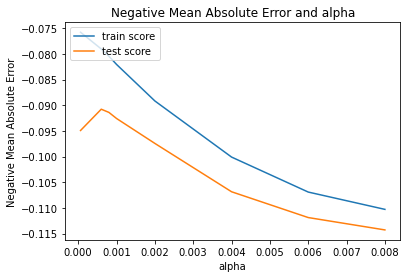

In [136]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [137]:
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([ 0.        ,  0.03380115,  0.        ,  0.0112075 , -0.00582731,
        0.10521692,  0.02801936,  0.00455586,  0.02448654,  0.01431   ,
        0.00128262, -0.02498451,  0.01876195,  0.02008791,  0.04355274,
        0.00364093,  0.01258801, -0.        ,  0.00913054,  0.00545801,
        0.01123826, -0.01603644, -0.        ,  0.        , -0.05015854,
       -0.03235771,  0.        ,  0.00804672,  0.        , -0.07153434,
        0.03181268, -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.01319386, -0.07523599,  0.        , -0.        ,
        0.        ,  0.        ,  0.08338332,  0.        ,  0.04781535,
       -0.        ,  0.        , -0.        , -0.        ,  0.03737799,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.02400295,  0.03177988,  0.        ,  0.1245974 , -0.06848045,
       -0.00083461, -0.06073409, -0.06807474, -0.        , -0.        ,
       -0.        , -0.        ,  0.05420633,  0.08747332, -0.00

In [138]:
lasso.score(X_train,y_train)

0.8975947067571806

In [139]:
X_test.drop(['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2'],axis=1,inplace=True)

In [140]:
lasso.score(X_test,y_test)

0.871617133906911

In [141]:
# Ridge model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
coeff = list(zip(cols, model_parameters))
coeff

[('constant', 11.95),
 ('BsmtUnfSF', -0.206),
 ('TotalBsmtSF', -0.076),
 ('1stFlrSF', -0.075),
 ('2ndFlrSF', -0.072),
 ('LowQualFinSF', -0.068),
 ('GrLivArea', -0.068),
 ('BsmtFullBath', -0.061),
 ('BsmtHalfBath', -0.05),
 ('FullBath', -0.045),
 ('HalfBath', -0.039),
 ('BedroomAbvGr', -0.032),
 ('KitchenAbvGr', -0.03),
 ('TotRmsAbvGrd', -0.028),
 ('Fireplaces', -0.026),
 ('GarageCars', -0.025),
 ('GarageArea', -0.025),
 ('WoodDeckSF', -0.021),
 ('OpenPorchSF', -0.02),
 ('EnclosedPorch', -0.019),
 ('3SsnPorch', -0.017),
 ('ScreenPorch', -0.016),
 ('PoolArea', -0.015),
 ('MiscVal', -0.014),
 ('MoSold', -0.013),
 ('HouseAge', -0.013),
 ('RemodAge', -0.011),
 ('GarageAge', -0.011),
 ('SoldAge', -0.01),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGE', -0.01),
 ('MSSubClass_1-STORY 1945 & OLDE', -0.009),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLE', -0.008),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWE', -0.007),
 ('MSSubClass_1-STORY W/FINISHED ATTIC ALL AGE', -0.006),
 (

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Ans:

 Optimal Value of Alpha for Ridge: 10
 Optimal Value of Alpha for Lasso: 0.001

 The R2 score for Ridge changed from 
 Train => Original : 91.0 Doubled : 90.3
 Test => Original : 87.9   Doubled : 87.3

 The R2 score for Lasso Change from
 Train => Original : 89.8 Doubled : 88.0
 Test => Original : 87.2   Doubled : 85.7

 Number of predictors for lasso changed from 87 to 65

 Most Important Predictor for Ridge Changed will be same 'LotFrontage' though the coefficient value is less than that of optimal
 Most Important Predictor for Lasso Changed will be same 'LotFrontage' though the coefficient value is less than that of optimal

Question 2
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

Ans:

 Optimal Value of Alpha for Ridge: 10
 Optimal Value of Alpha for Lasso: 0.001

    r2_score in train dataset:
    r2_score for ridge: 0.91
    r2_score for lasso: 0.9
    r2_score in test dataset:
    r2_score for ridge: 0.88
    r2_score for lasso: 0.87

 I would apply Lasso as the number of predictors will be less with little to no significant effect on the accuracy

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

Ans:

 The five most important predictor variable are:
 1. BsmtUnfSF
 2. TotalBsmtSF
 3. 1stFlrSF
 4. 2ndFlrSF
 5. LowQualFinSF

Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

Ans:

1. Use models that are more robust to outliers
2. Use appropriate Data Transformation
3. Use more robust error metrics
4. Model explainablity is more important than accuracy though generalisable models have problems is attaining higher accuracy
